In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, precision_score, recall_score, accuracy_score, r2_score
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, Conv1DTranspose, Lambda, Reshape, GlobalAveragePooling1D
from tensorflow.keras.layers import Input,Dropout,Dense,LSTM,TimeDistributed,RepeatVector




# Data Preprocessing

In [104]:
# Data loading 
data = pd.read_csv('../dataset/MetroPT3.csv')

In [105]:
# Drop unneccessary columns
data = data.drop('Unnamed: 0', axis=1)
data

timestamp    TP2    TP3     H1  DV_pressure  Reservoirs  \
0        2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024       9.358   
1        2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022       9.348   
2        2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022       9.338   
3        2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022       9.328   
4        2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022       9.318   
...                      ...    ...    ...    ...          ...         ...   
1516943  2020-09-01 03:59:10 -0.014  8.918  8.906       -0.022       8.918   
1516944  2020-09-01 03:59:20 -0.014  8.904  8.888       -0.020       8.904   
1516945  2020-09-01 03:59:30 -0.014  8.890  8.876       -0.022       8.892   
1516946  2020-09-01 03:59:40 -0.012  8.876  8.864       -0.022       8.878   
1516947  2020-09-01 03:59:50 -0.014  8.860  8.848       -0.022       8.864   

         Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  LPS  \
0                 53.600         0.0400   1.0         0.0     1.0  1.0  0.0   
1                 53.675         0.0400   1.0         0.0     1.0  1.0  0.0   
2                 53.600         0.0425   1.0         0.0     1.0  1.0  0.0   
3                 53.425         0.0400   1.0         0.0     1.0  1.0  0.0   
4                 53.475         0.0400   1.0         0.0     1.0  1.0  0.0   
...                  ...            ...   ...         ...     ...  ...  ...   
1516943           59.675         0.0425   1.0         0.0     1.0  1.0  0.0   
1516944           59.600         0.0450   1.0         0.0     1.0  1.0  0.0   
1516945           59.600         0.0425   1.0         0.0     1.0  1.0  0.0   
1516946           59.550         0.0450   1.0         0.0     1.0  1.0  0.0   
1516947           59.475         0.0425   1.0         0.0     1.0  1.0  0.0   

         Pressure_switch  Oil_level  Caudal_impulses  
0                    1.0        1.0              1.0  
1                    1.0        1.0              1.0  
2                    1.0        1.0              1.0  
3                    1.0        1.0              1.0  
4                    1.0        1.0              1.0  
...                  ...        ...              ...  
1516943              1.0        1.0              1.0  
1516944              1.0        1.0              1.0  
1516945              1.0        1.0              1.0  
1516946              1.0        1.0              1.0  
1516947              1.0        1.0              1.0  

[1516948 rows x 16 columns]

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   timestamp        1516948 non-null  object 
 1   TP2              1516948 non-null  float64
 2   TP3              1516948 non-null  float64
 3   H1               1516948 non-null  float64
 4   DV_pressure      1516948 non-null  float64
 5   Reservoirs       1516948 non-null  float64
 6   Oil_temperature  1516948 non-null  float64
 7   Motor_current    1516948 non-null  float64
 8   COMP             1516948 non-null  float64
 9   DV_eletric       1516948 non-null  float64
 10  Towers           1516948 non-null  float64
 11  MPG              1516948 non-null  float64
 12  LPS              1516948 non-null  float64
 13  Pressure_switch  1516948 non-null  float64
 14  Oil_level        1516948 non-null  float64
 15  Caudal_impulses  1516948 non-null  float64
dtypes: float64(15), ob

In [107]:
data.describe()

TP2           TP3            H1   DV_pressure    Reservoirs  \
count  1.516948e+06  1.516948e+06  1.516948e+06  1.516948e+06  1.516948e+06   
mean   1.367826e+00  8.984611e+00  7.568155e+00  5.595619e-02  8.985233e+00   
std    3.250930e+00  6.390951e-01  3.333200e+00  3.824015e-01  6.383070e-01   
min   -3.200000e-02  7.300000e-01 -3.600000e-02 -3.200000e-02  7.120000e-01   
25%   -1.400000e-02  8.492000e+00  8.254000e+00 -2.200000e-02  8.494000e+00   
50%   -1.200000e-02  8.960000e+00  8.784000e+00 -2.000000e-02  8.960000e+00   
75%   -1.000000e-02  9.492000e+00  9.374000e+00 -1.800000e-02  9.492000e+00   
max    1.067600e+01  1.030200e+01  1.028800e+01  9.844000e+00  1.030000e+01   

       Oil_temperature  Motor_current          COMP    DV_eletric  \
count     1.516948e+06   1.516948e+06  1.516948e+06  1.516948e+06   
mean      6.264418e+01   2.050171e+00  8.369568e-01  1.606106e-01   
std       6.516261e+00   2.302053e+00  3.694052e-01  3.671716e-01   
min       1.540000e+01   2.000000e-02  0.000000e+00  0.000000e+00   
25%       5.777500e+01   4.000000e-02  1.000000e+00  0.000000e+00   
50%       6.270000e+01   4.500000e-02  1.000000e+00  0.000000e+00   
75%       6.725000e+01   3.807500e+00  1.000000e+00  0.000000e+00   
max       8.905000e+01   9.295000e+00  1.000000e+00  1.000000e+00   

             Towers           MPG           LPS  Pressure_switch  \
count  1.516948e+06  1.516948e+06  1.516948e+06     1.516948e+06   
mean   9.198483e-01  8.326640e-01  3.420025e-03     9.914368e-01   
std    2.715280e-01  3.732757e-01  5.838091e-02     9.214078e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00   
25%    1.000000e+00  1.000000e+00  0.000000e+00     1.000000e+00   
50%    1.000000e+00  1.000000e+00  0.000000e+00     1.000000e+00   
75%    1.000000e+00  1.000000e+00  0.000000e+00     1.000000e+00   
max    1.000000e+00  1.000000e+00  1.000000e+00     1.000000e+00   

          Oil_level  Caudal_impulses  
count  1.516948e+06     1.516948e+06  
mean   9.041556e-01     9.371066e-01  
std    2.943779e-01     2.427712e-01  
min    0.000000e+00     0.000000e+00  
25%    1.000000e+00     1.000000e+00  
50%    1.000000e+00     1.000000e+00  
75%    1.000000e+00     1.000000e+00  
max    1.000000e+00     1.000000e+00

In [108]:
data.nunique()

timestamp          1516948
TP2                   5257
TP3                   3683
H1                    2665
DV_pressure           2257
Reservoirs            3682
Oil_temperature       2462
Motor_current         1809
COMP                     2
DV_eletric               2
Towers                   2
MPG                      2
LPS                      2
Pressure_switch          2
Oil_level                2
Caudal_impulses          2
dtype: int64

In [109]:
data.isnull().sum()

timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

In [110]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Exploratory Data Analysis

#### Visualising The Data - 24 Hour Time Windows on a 30mins time data

In [12]:
# Data Preprocessing
df = data.copy()
df = df.resample('30min').mean().interpolate()

def plot_data(data, start, end):
    plot_data = data[start: end]
    for column in plot_data.columns:
        plt.figure(figsize=(20,5))
        sns.lineplot(data=plot_data, x=plot_data.index, y=plot_data[column])
        plt.title(f"Trend of Feature {column}")
        plt.xlabel("Datetime")
        plt.show()

#### Normal Day Trend

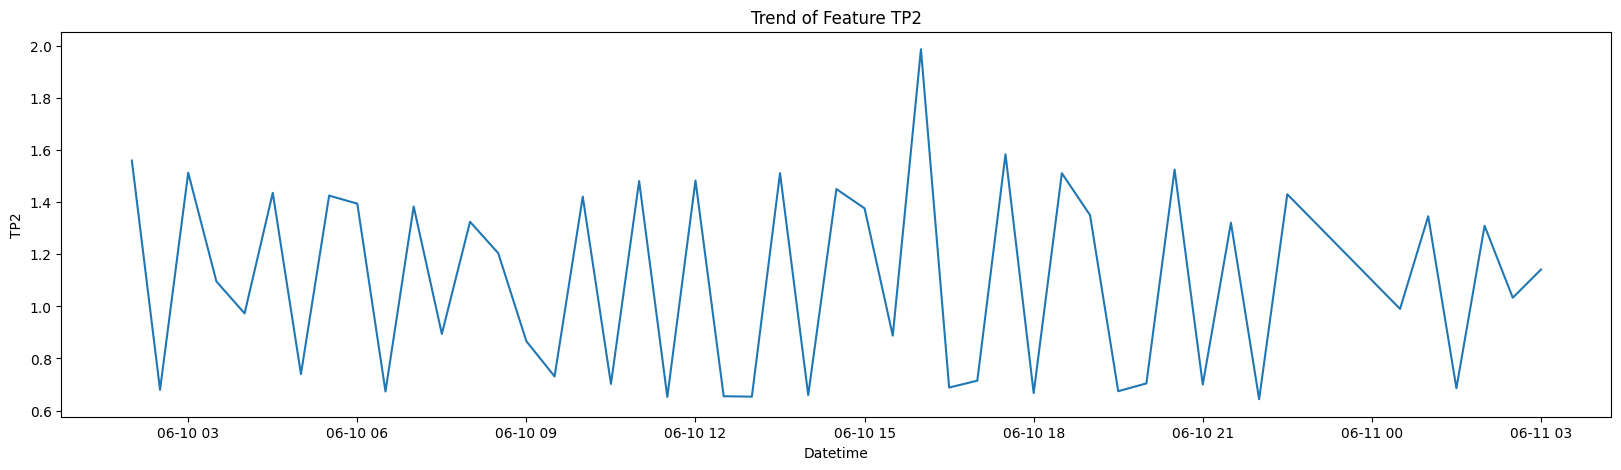

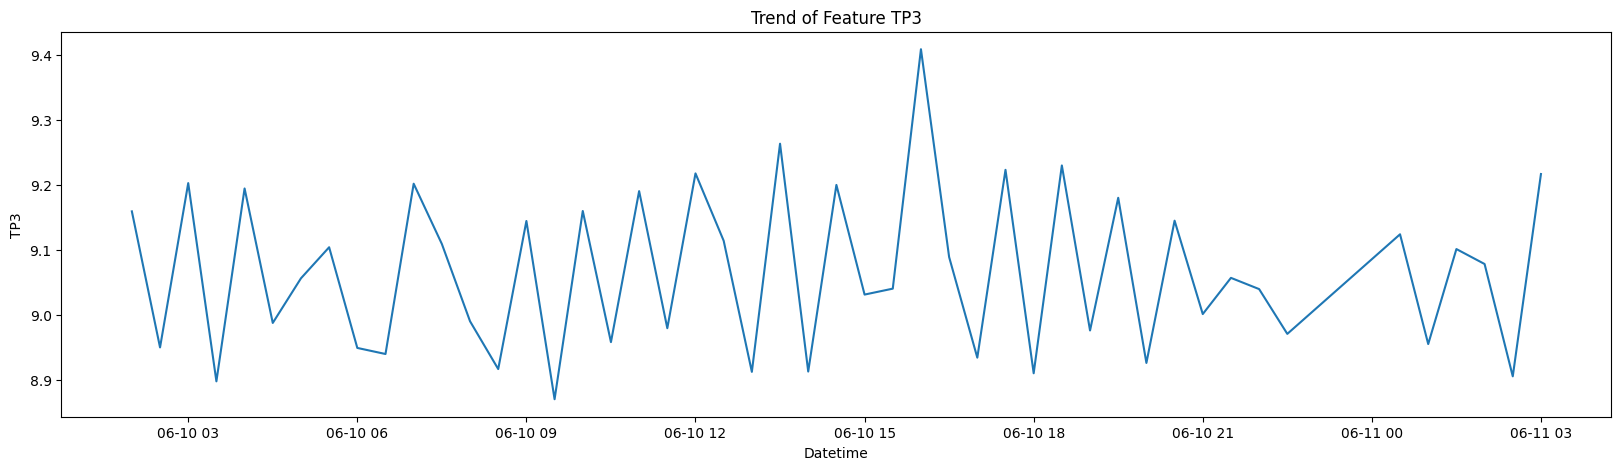

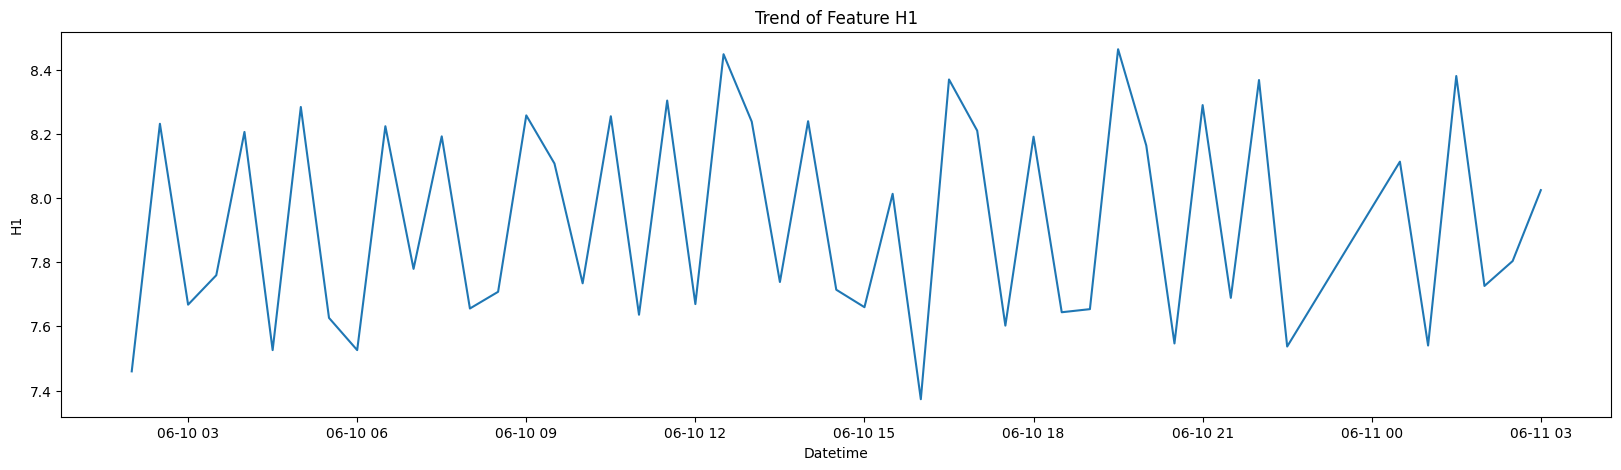

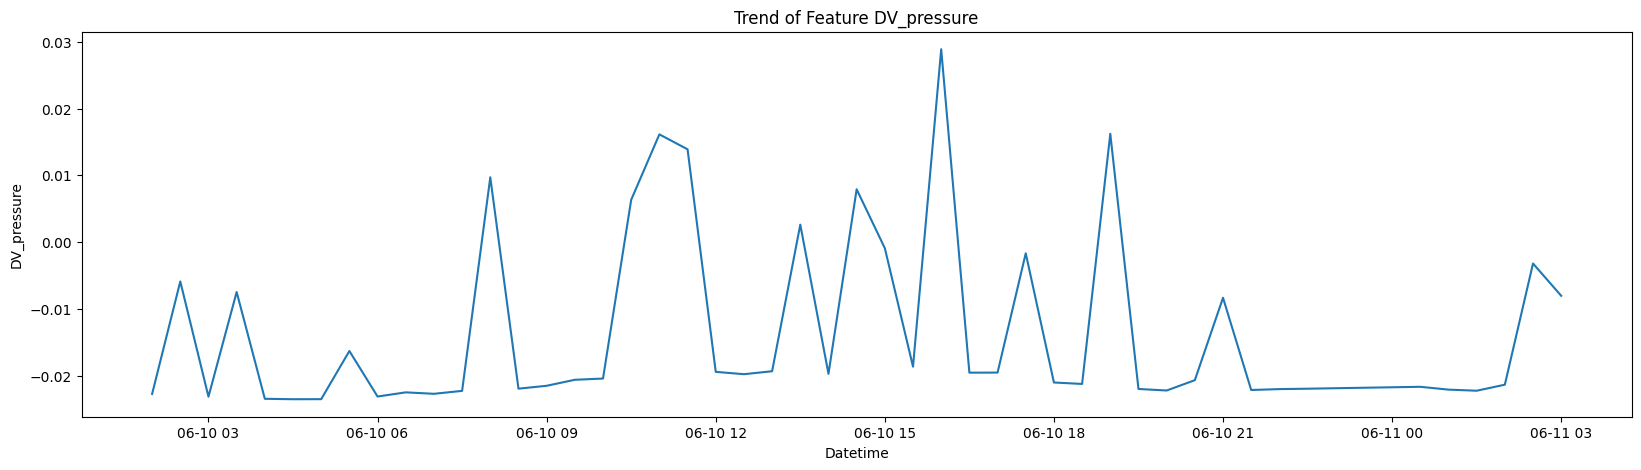

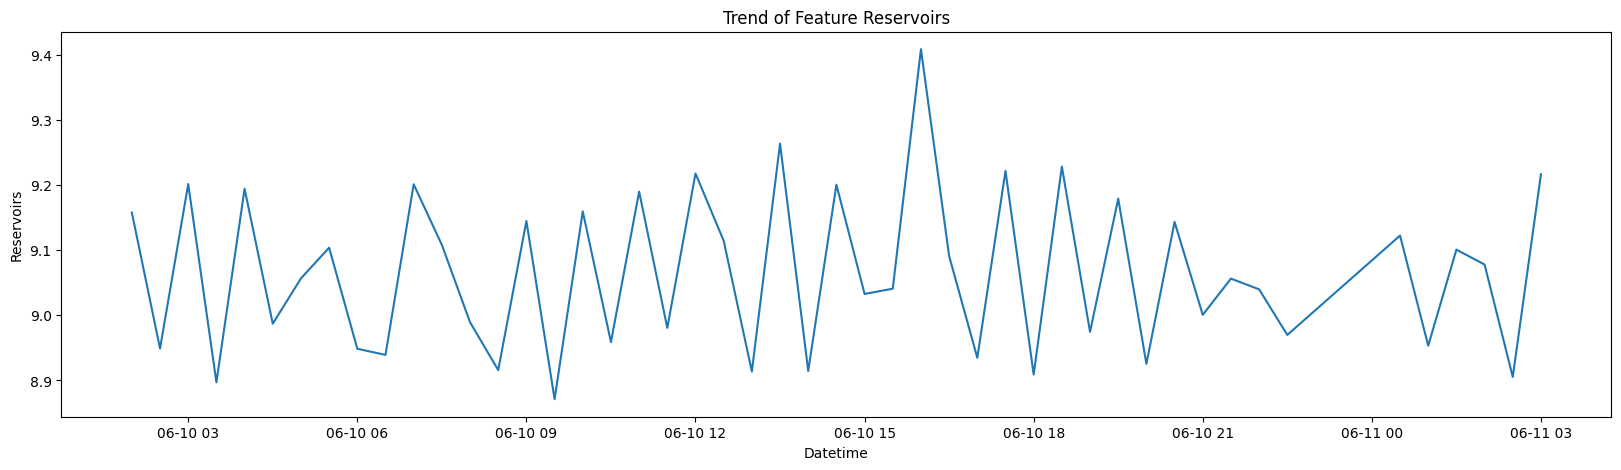

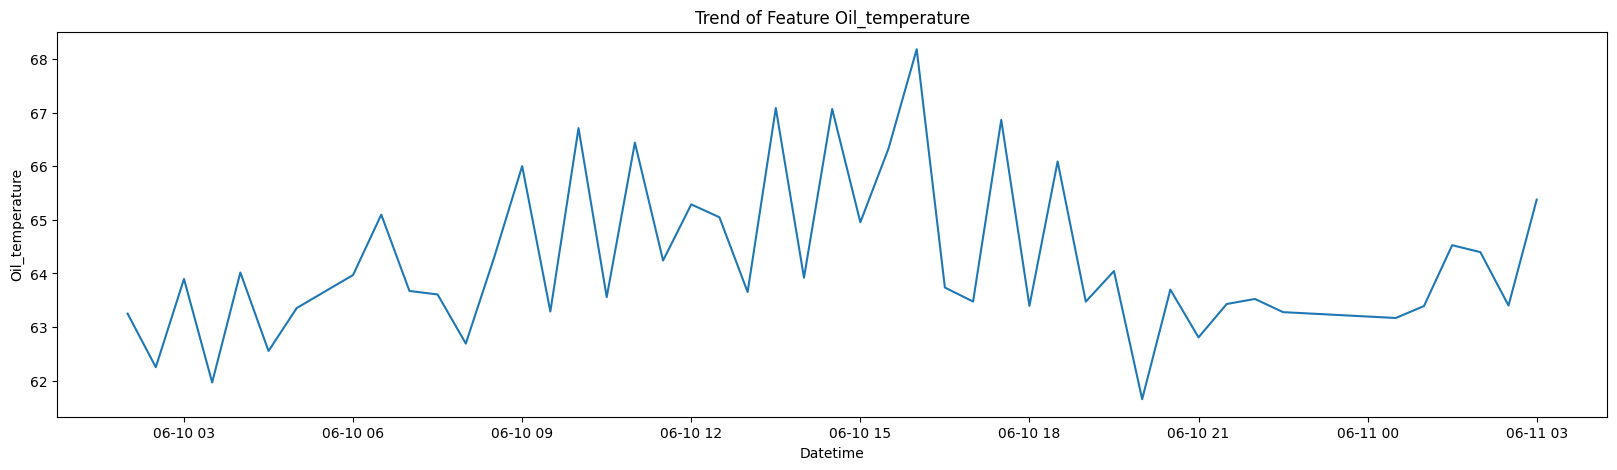

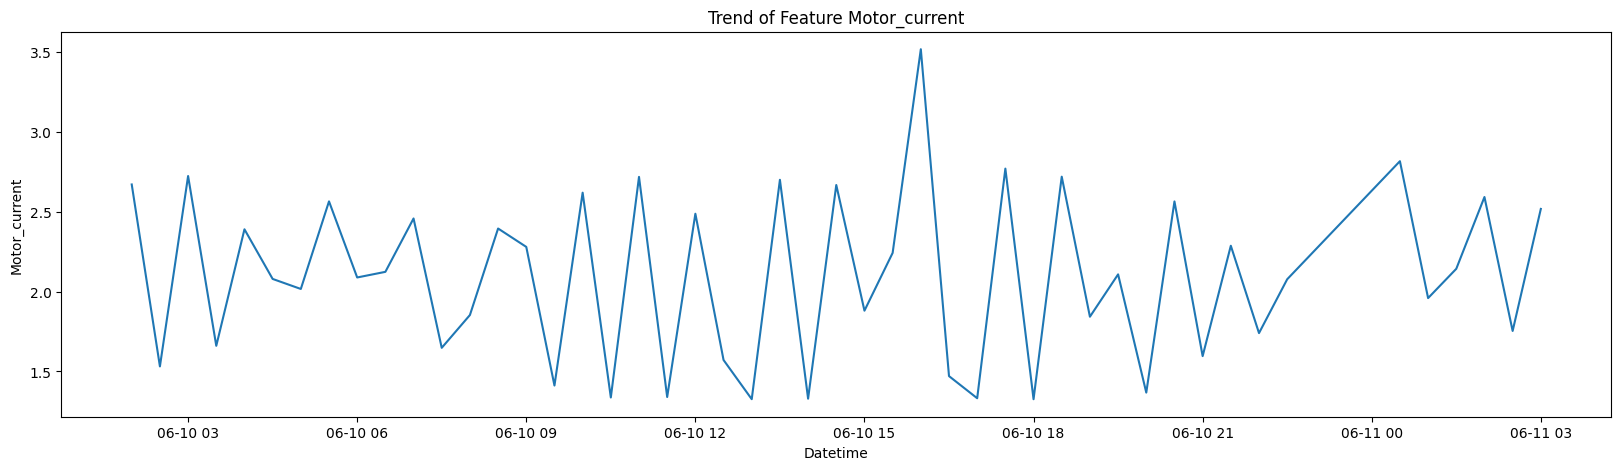

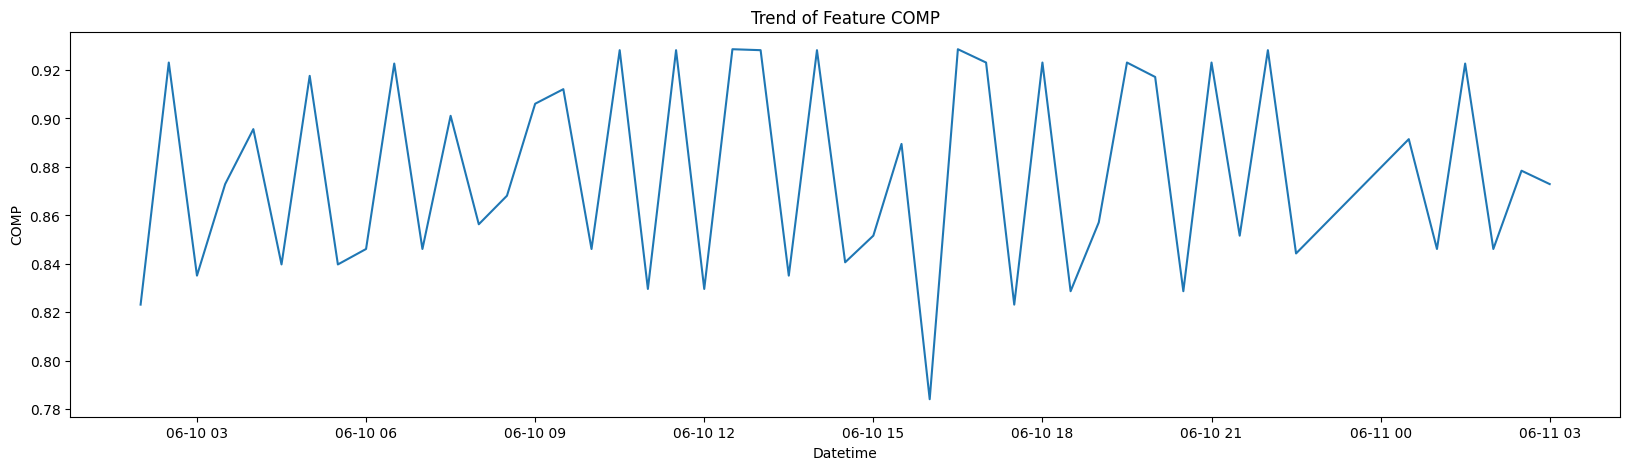

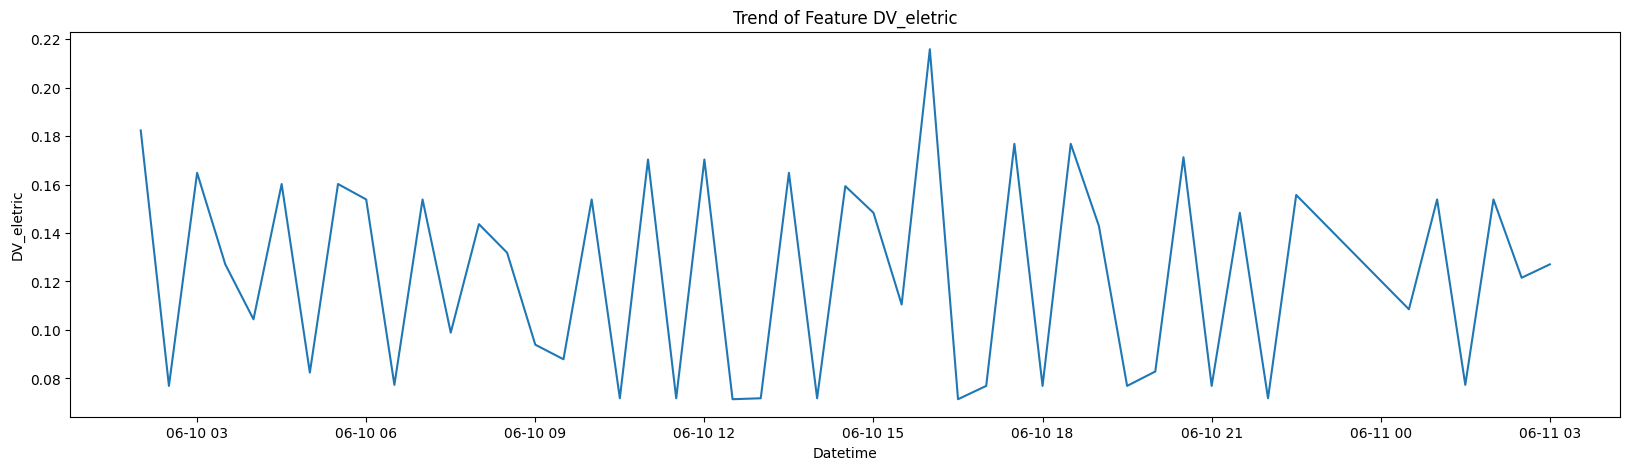

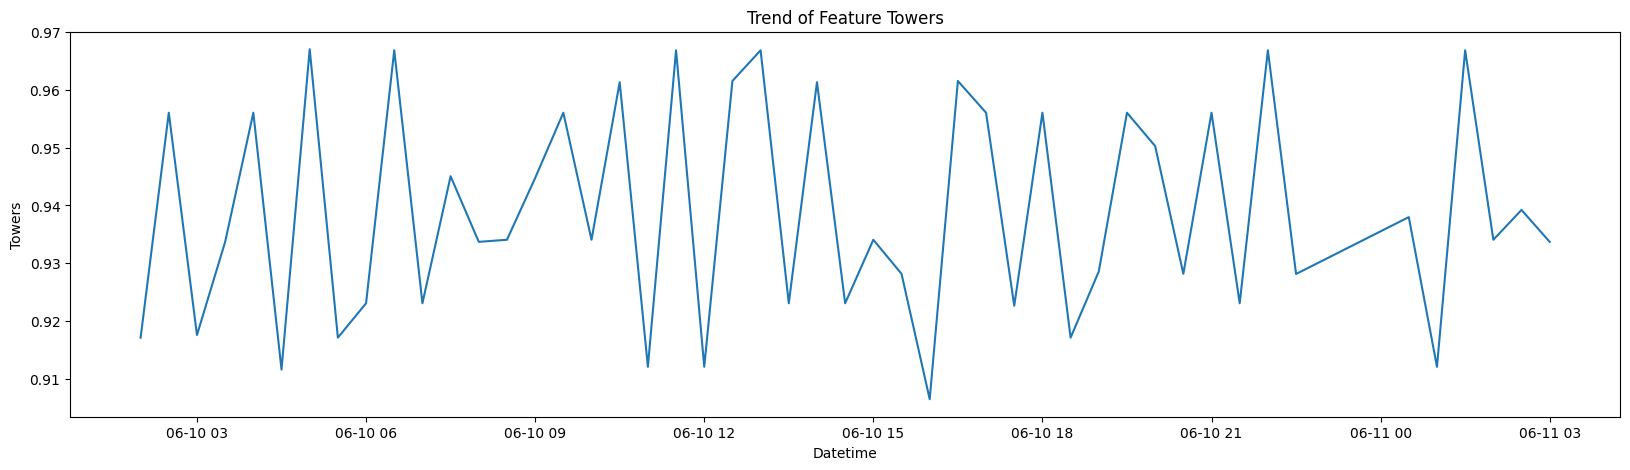

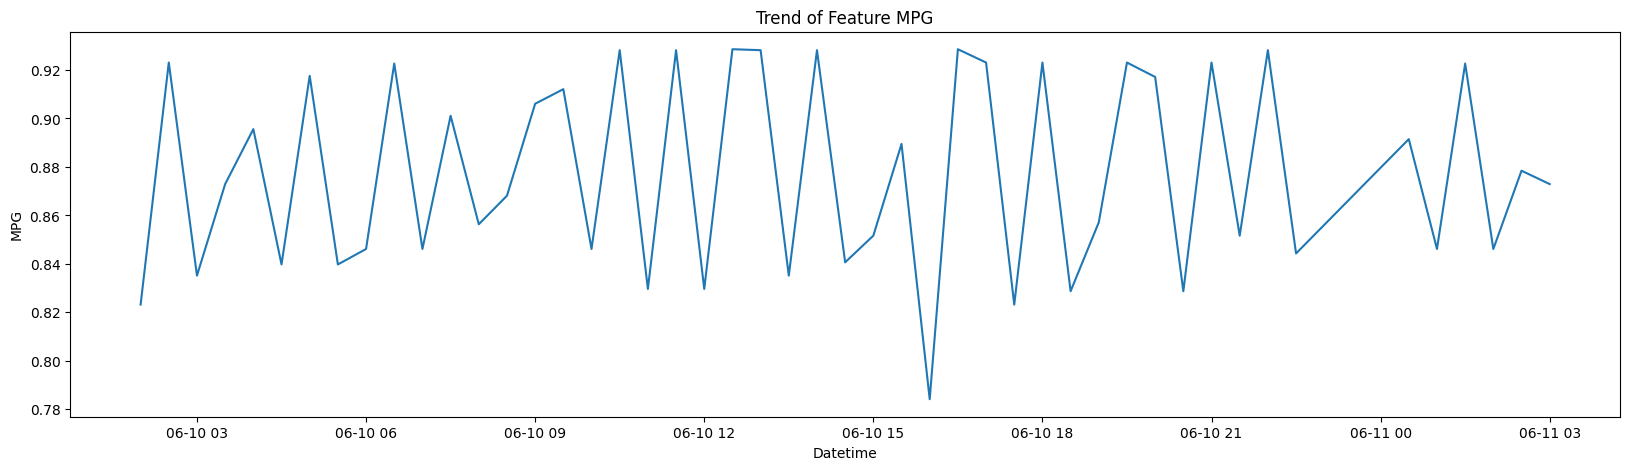

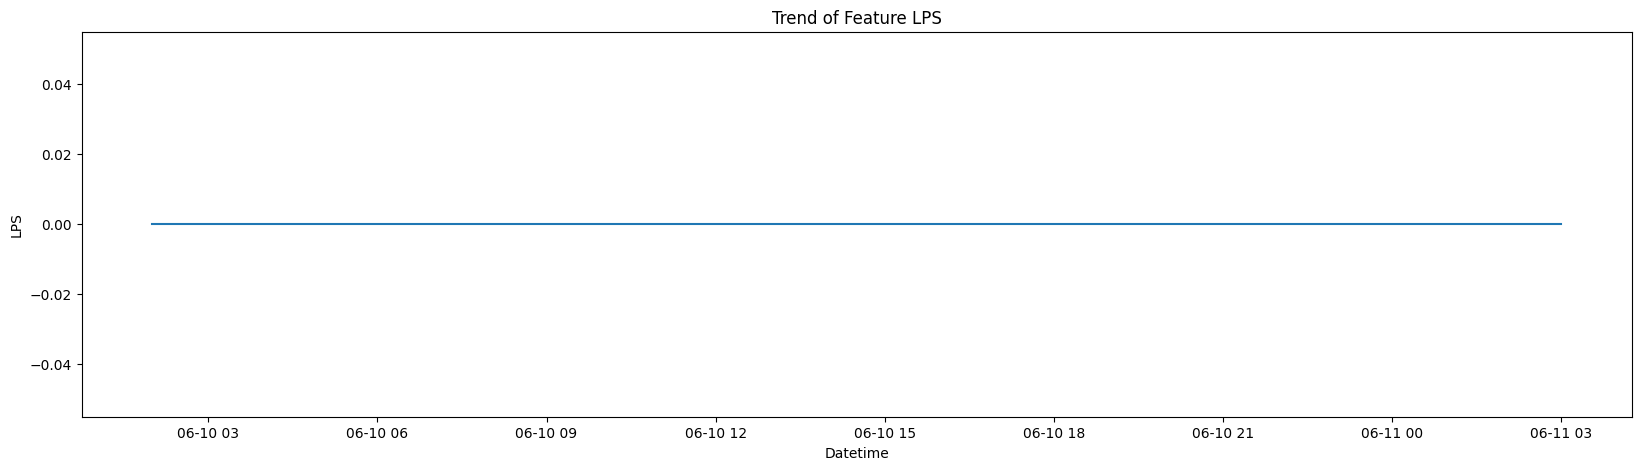

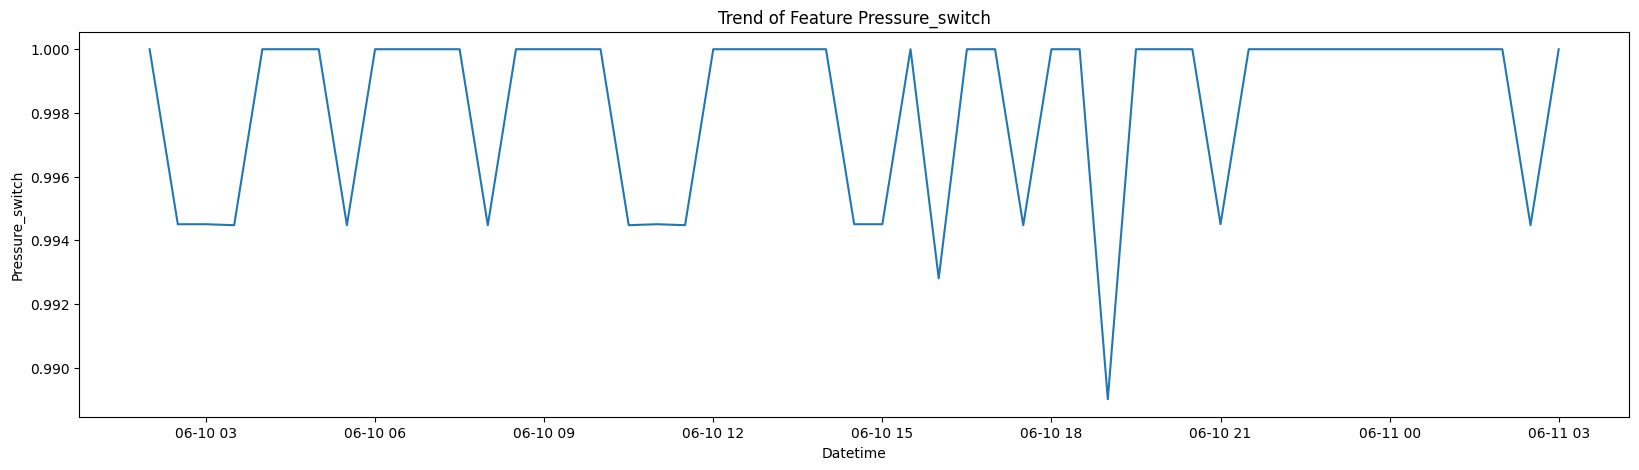

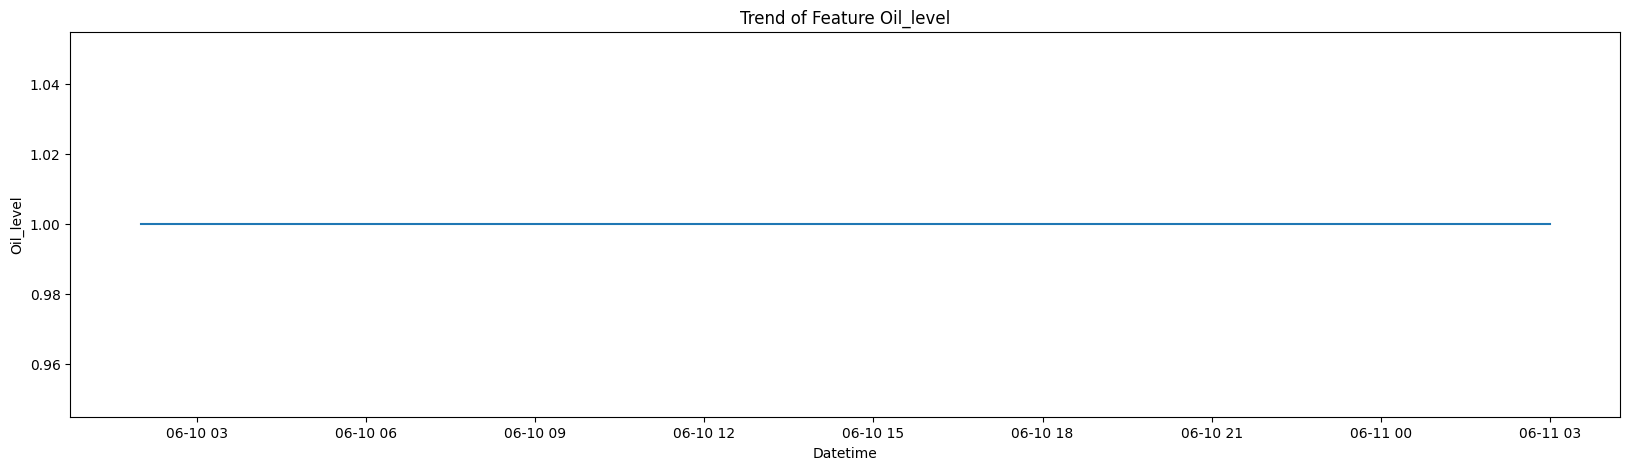

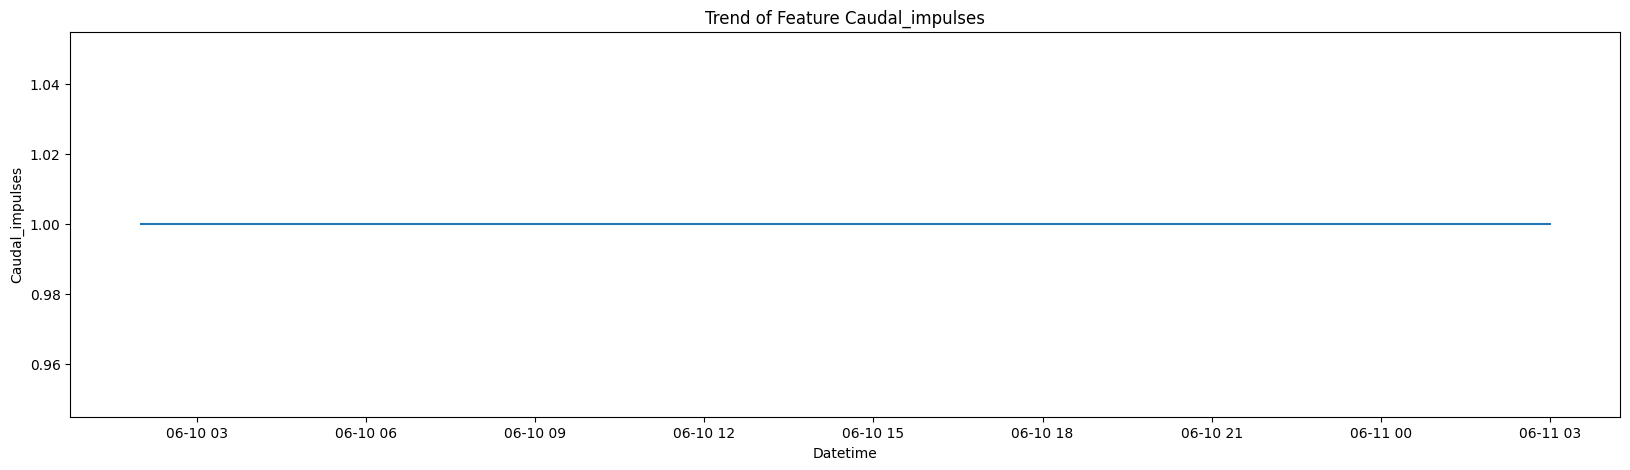

In [13]:
plot_data(df, start=datetime(2020,6,10,2,0), end=datetime(2020,6,11,3,0))

#### Failure Day Trend

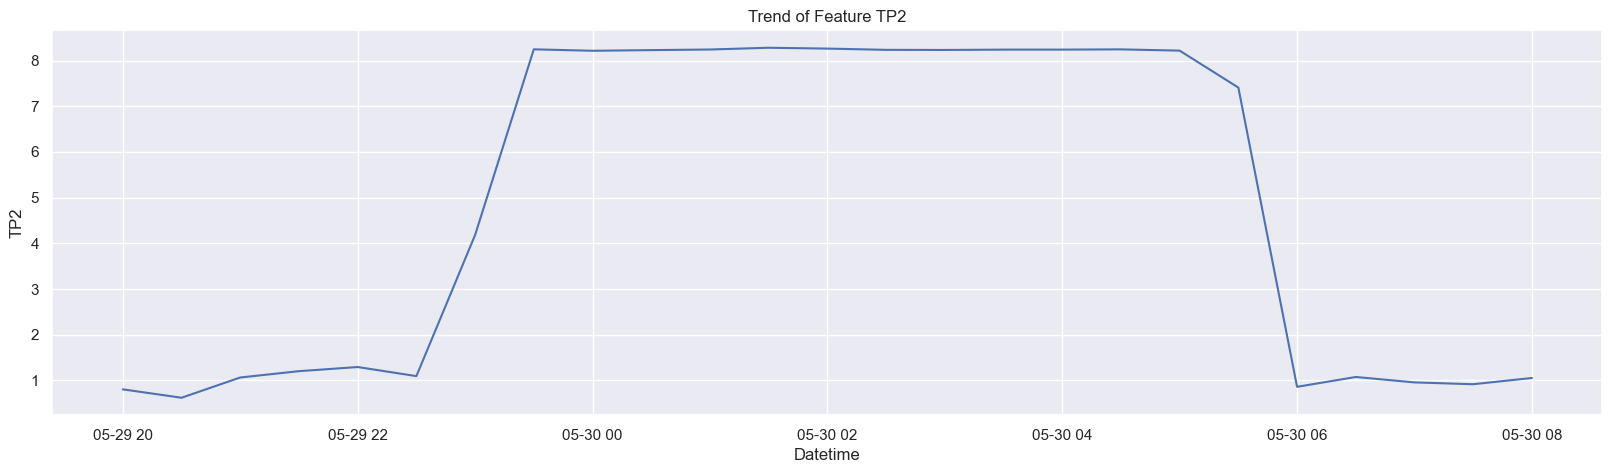

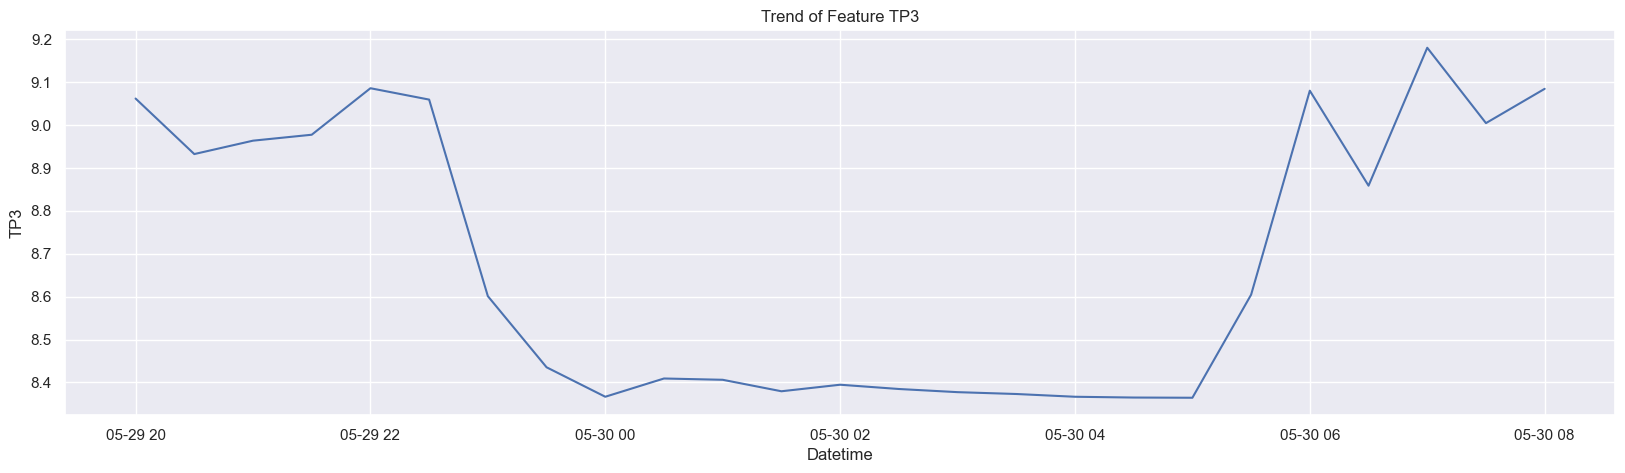

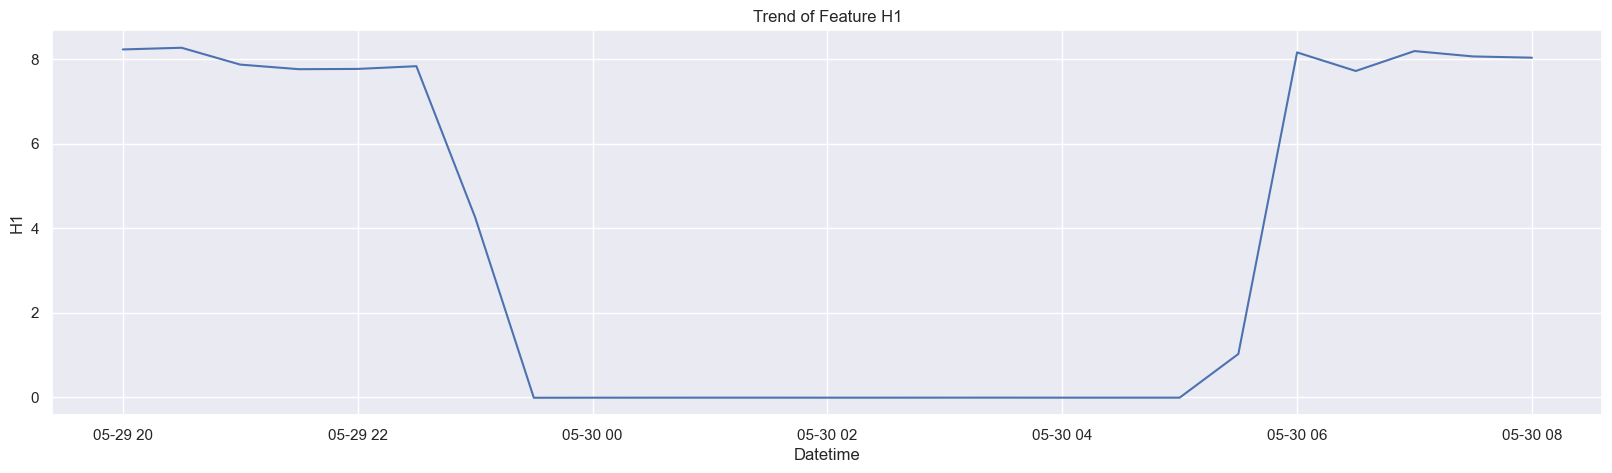

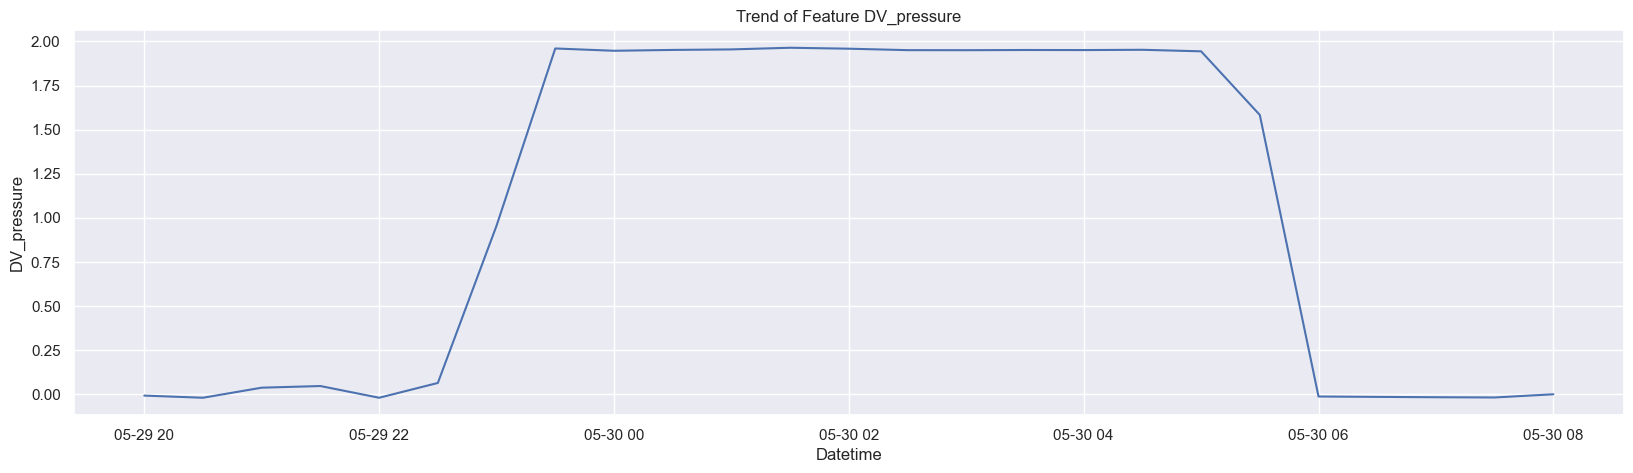

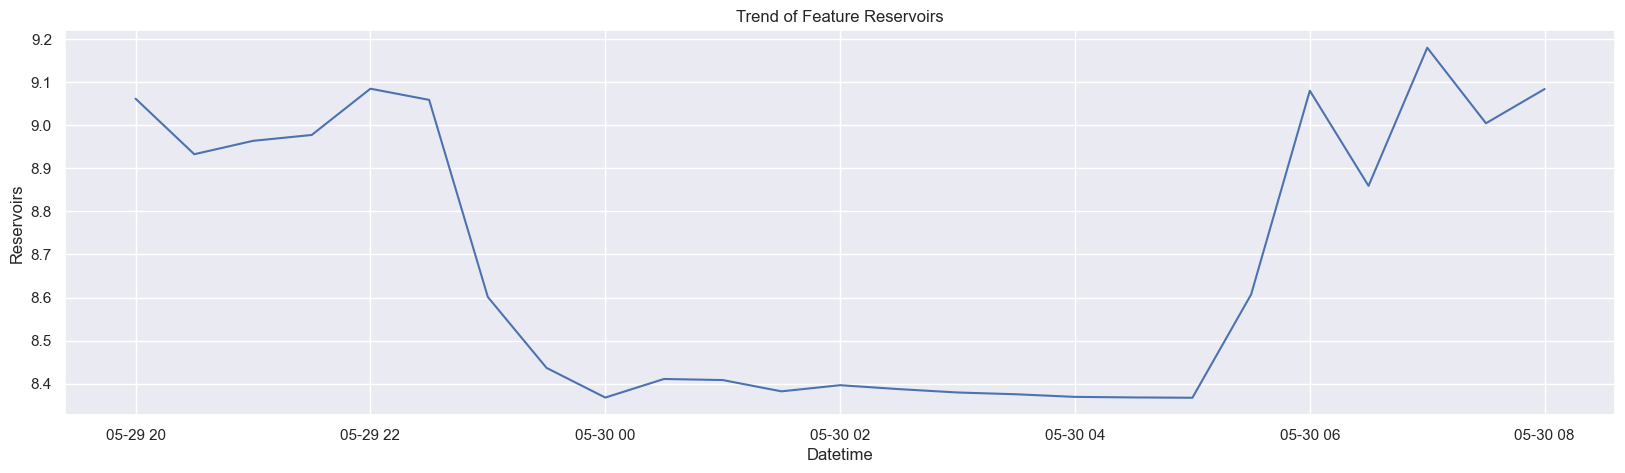

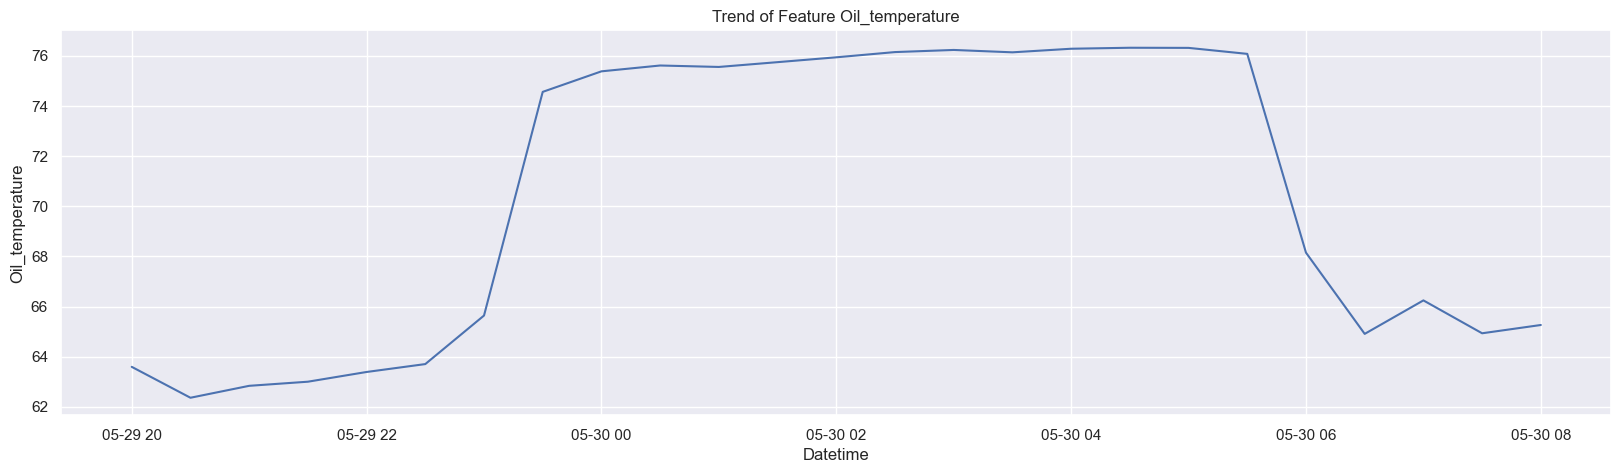

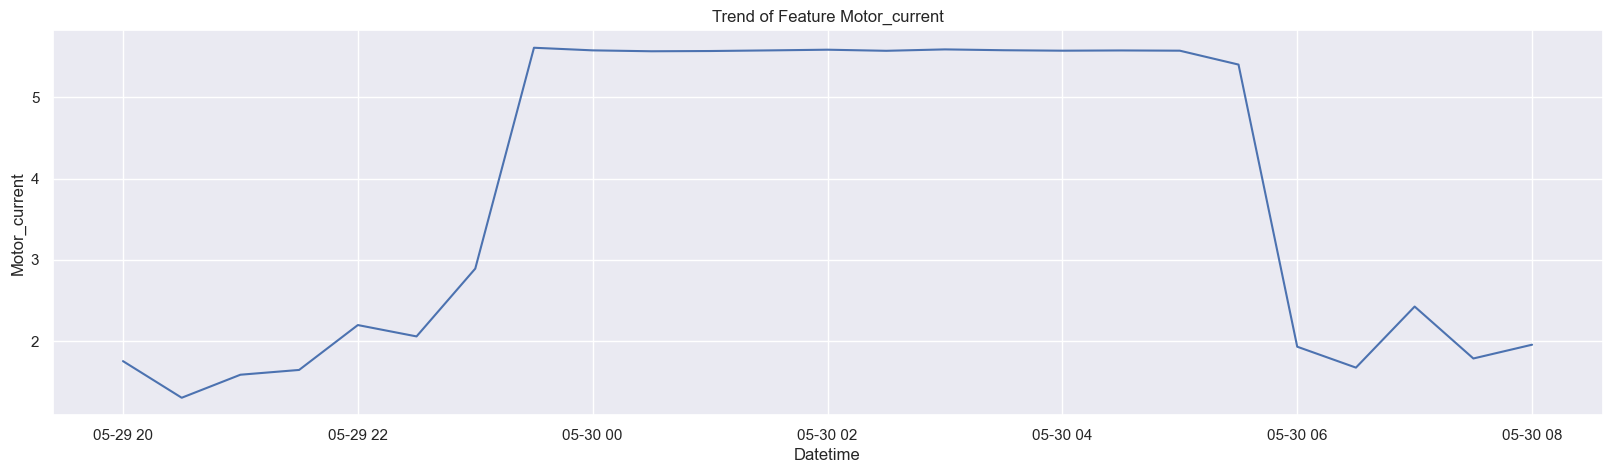

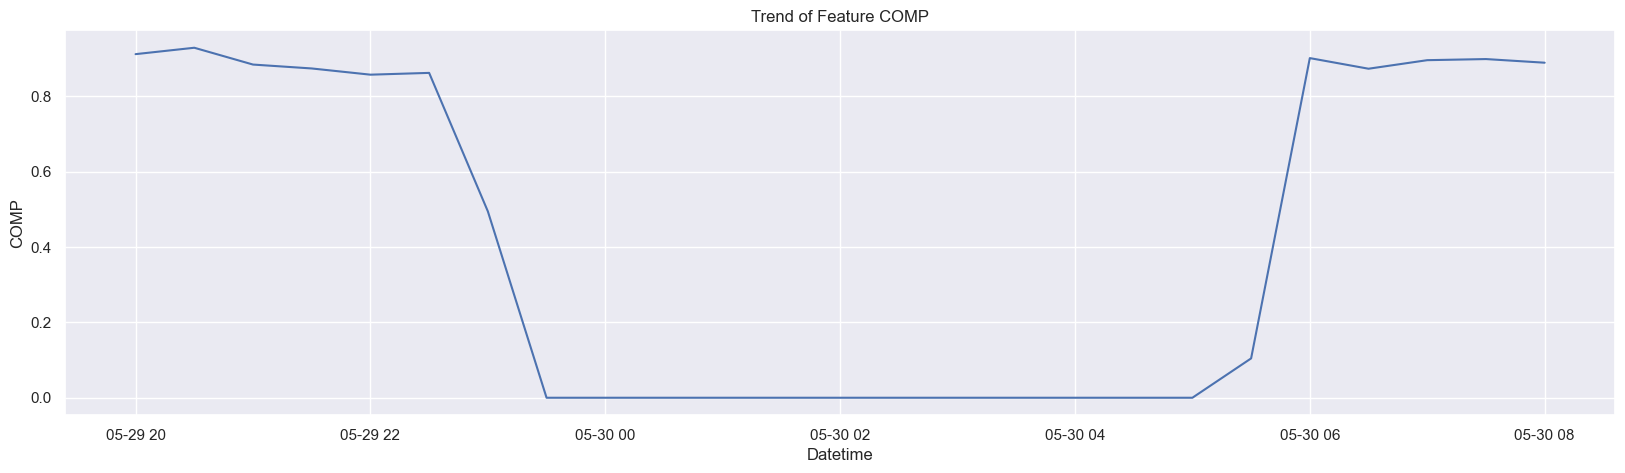

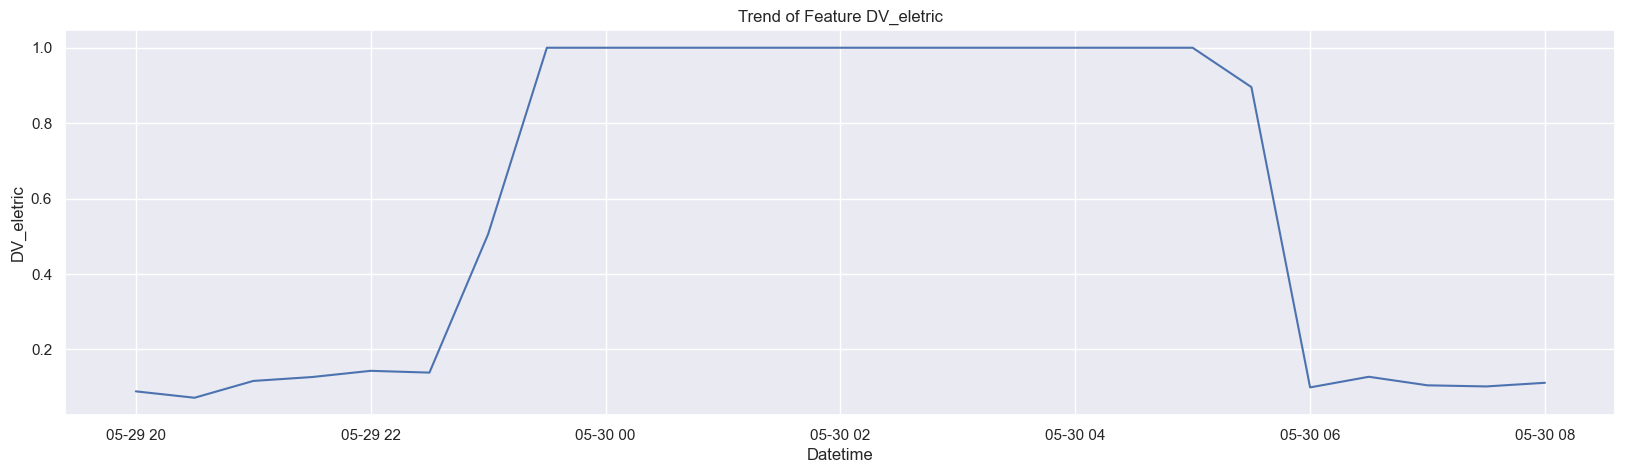

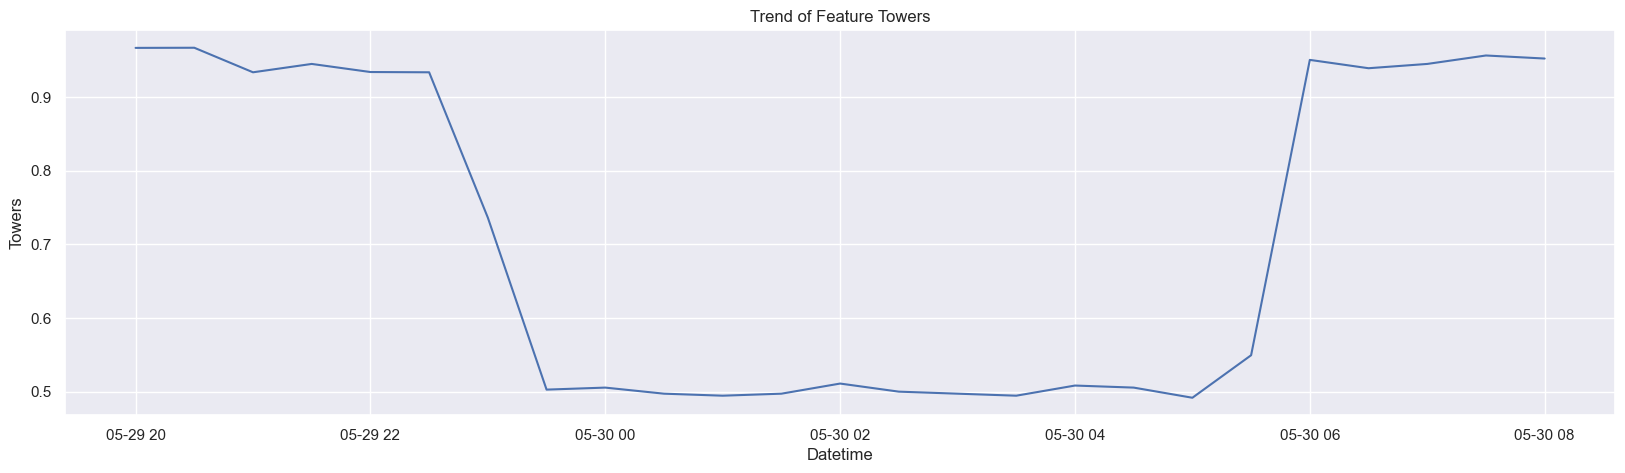

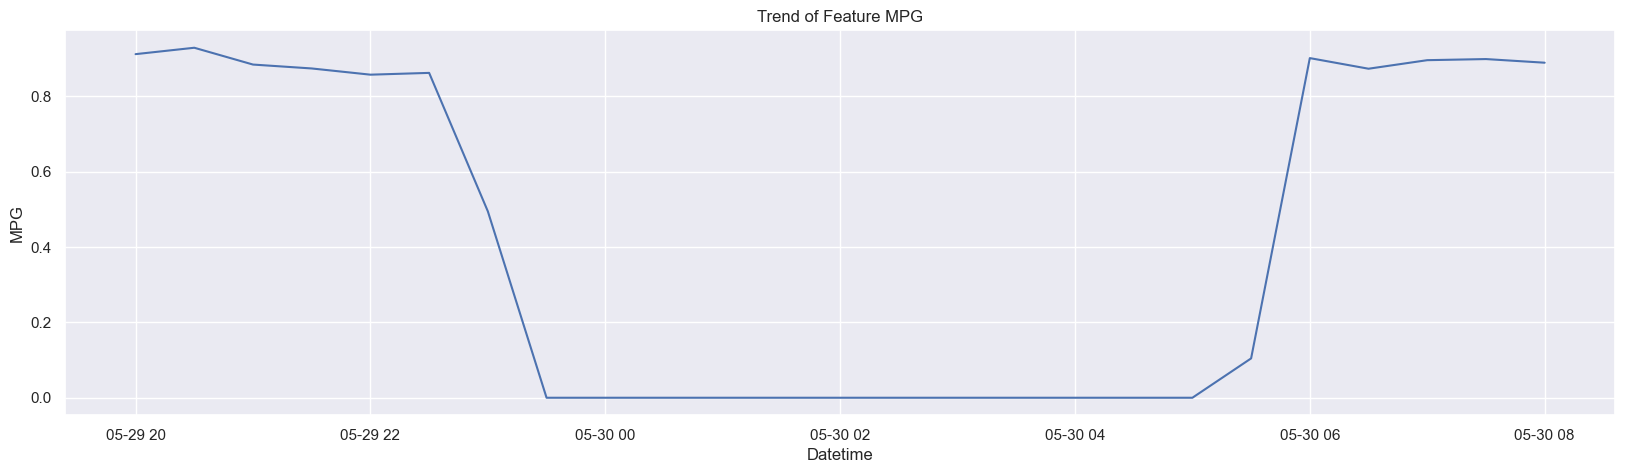

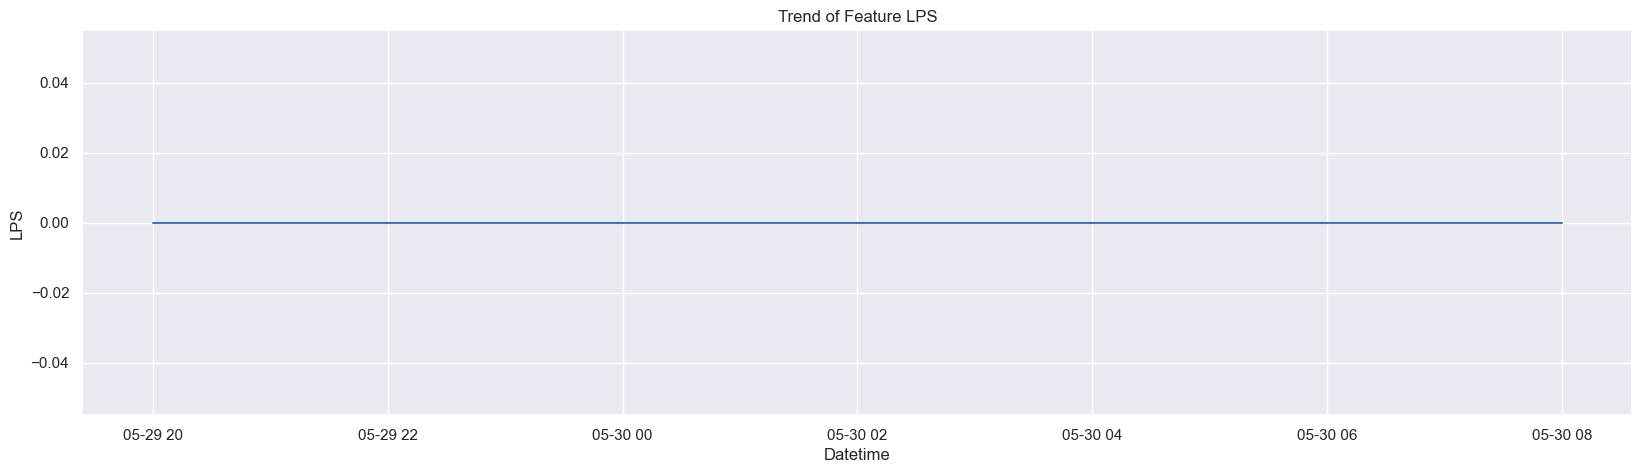

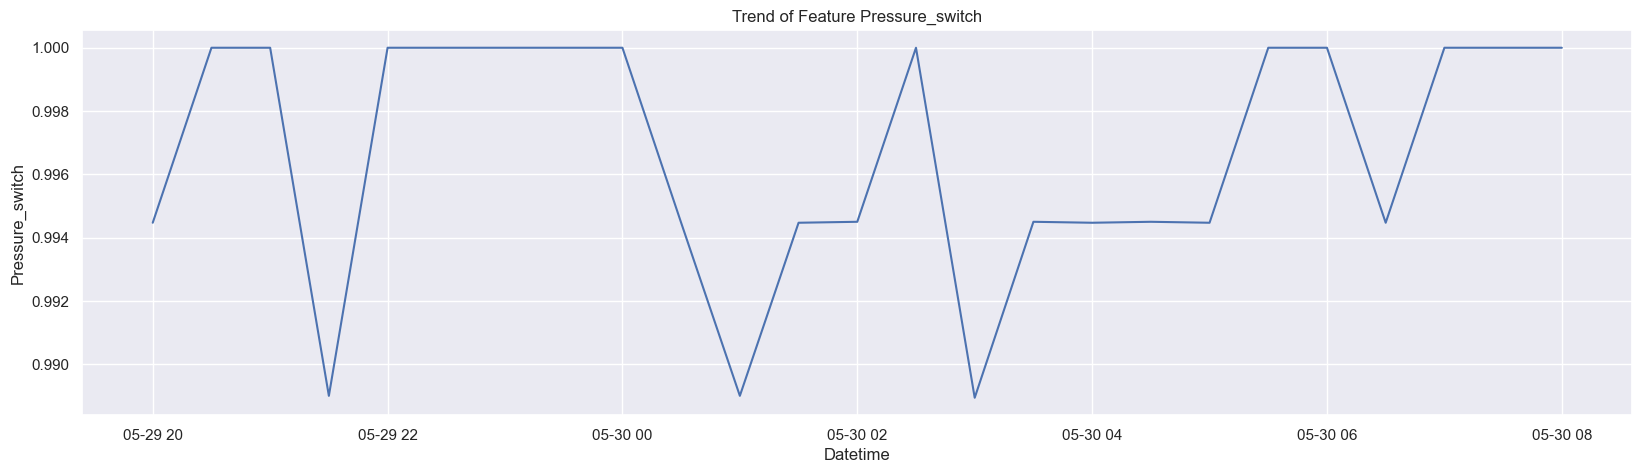

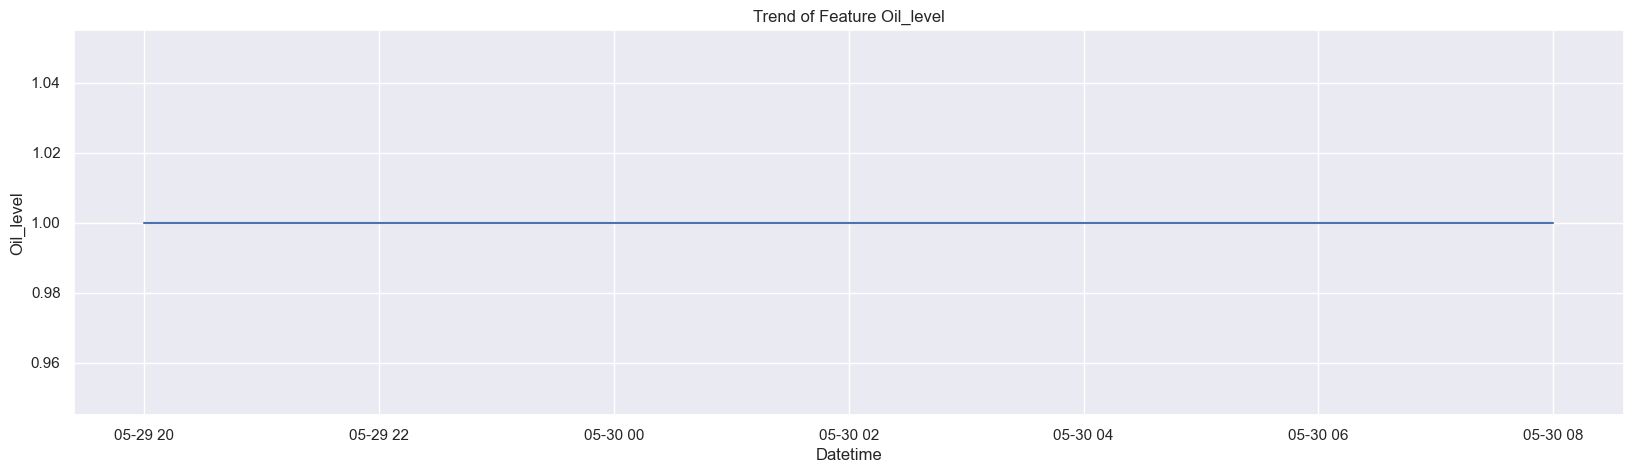

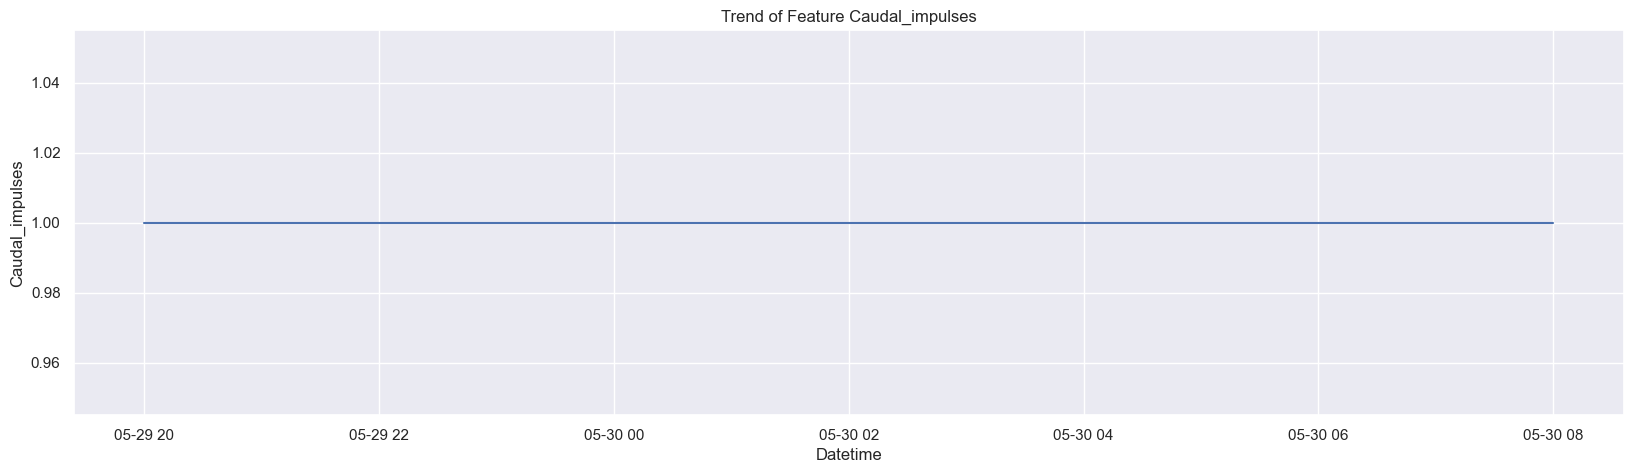

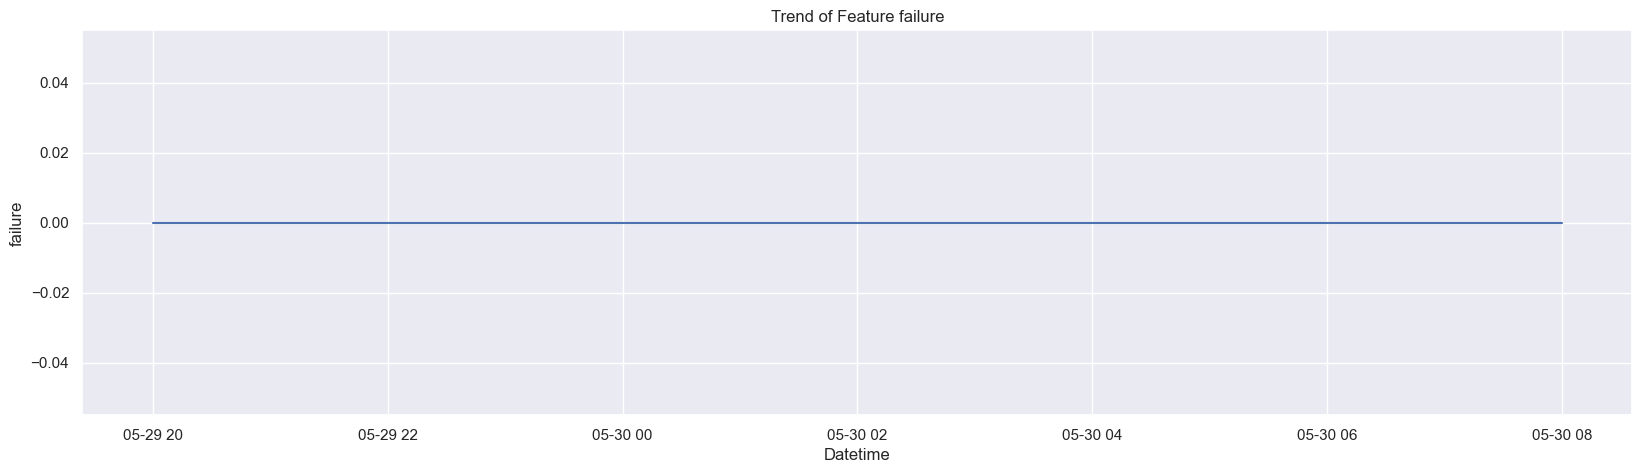

In [185]:
plot_data(df, start=datetime(2020,5,29,20,0), end=datetime(2020,5,30,8,0))

#### Another Failure Day Trend

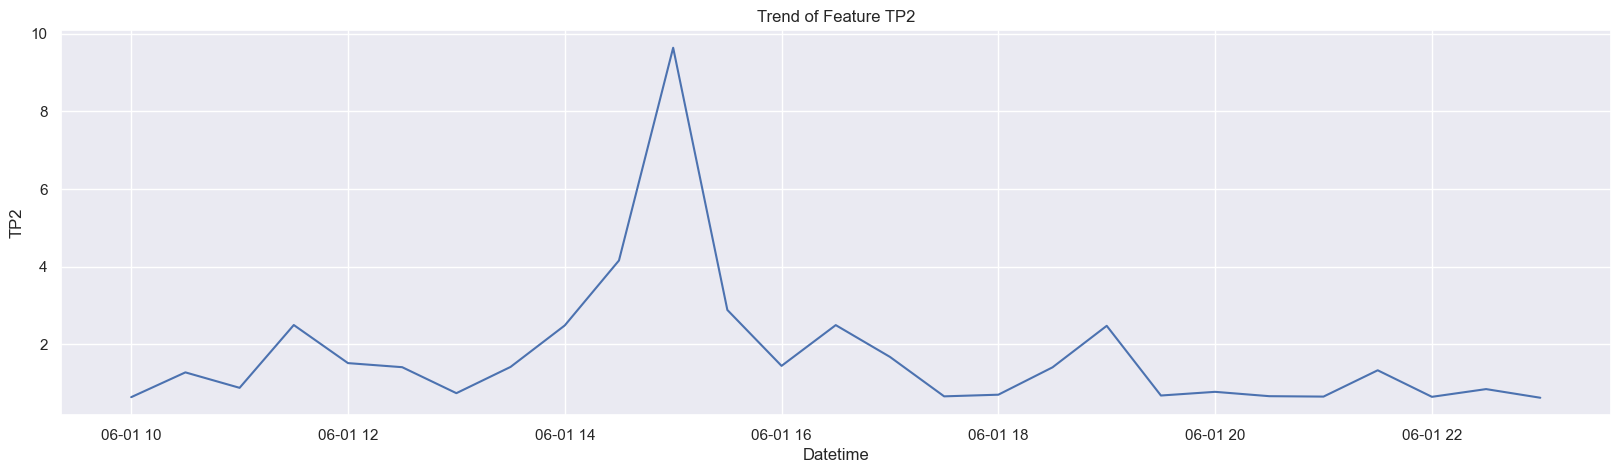

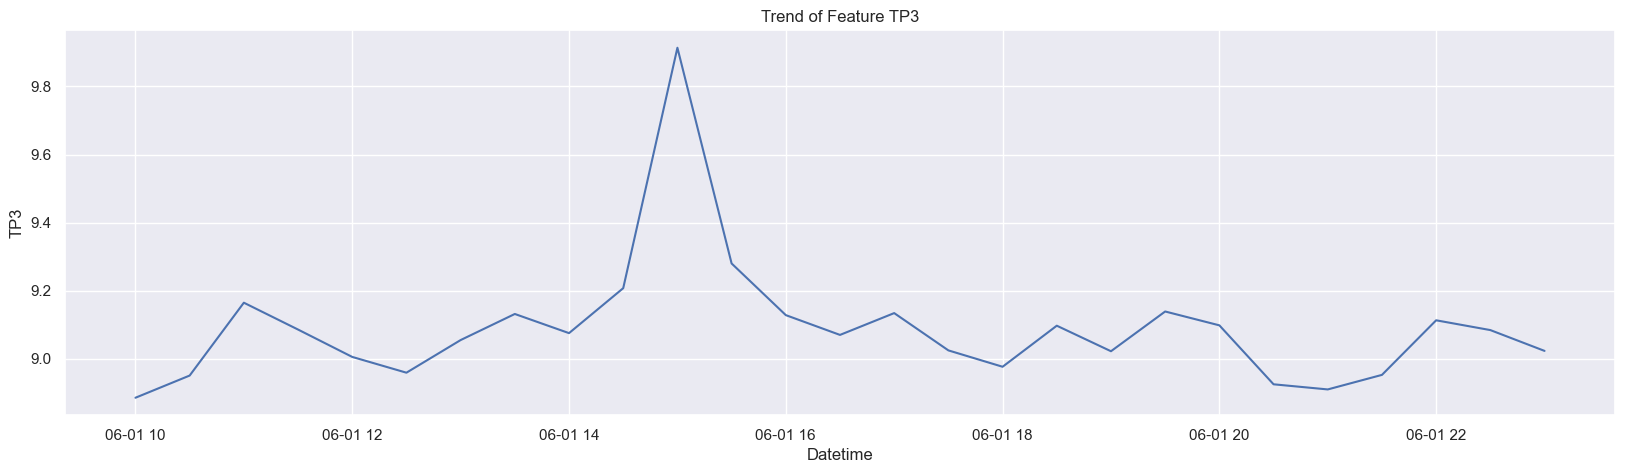

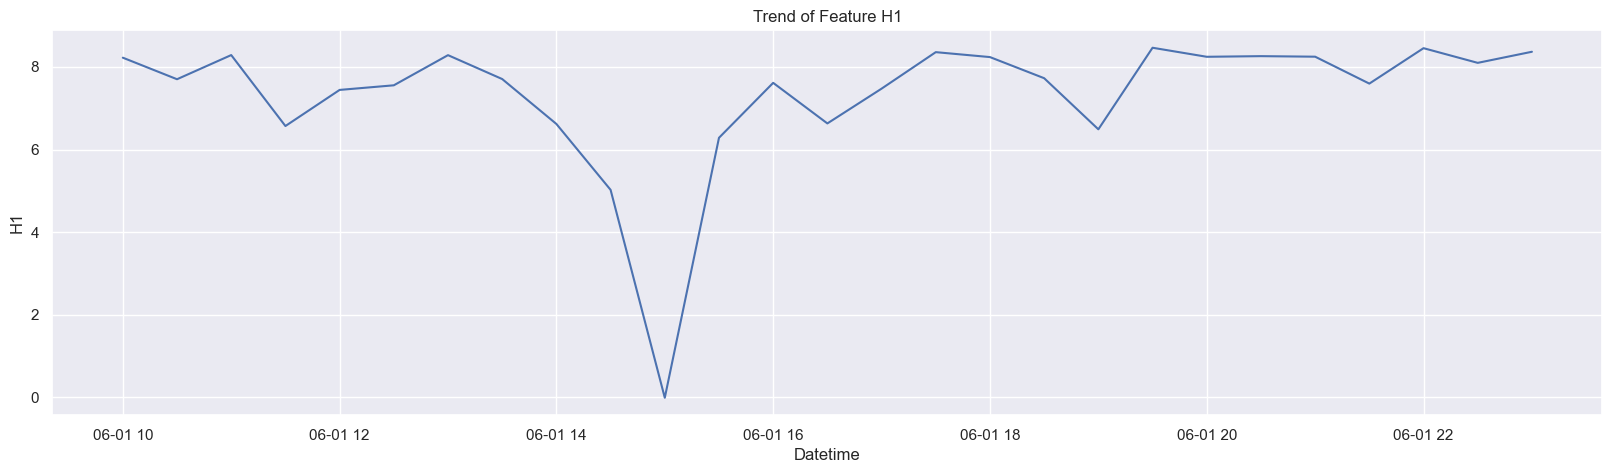

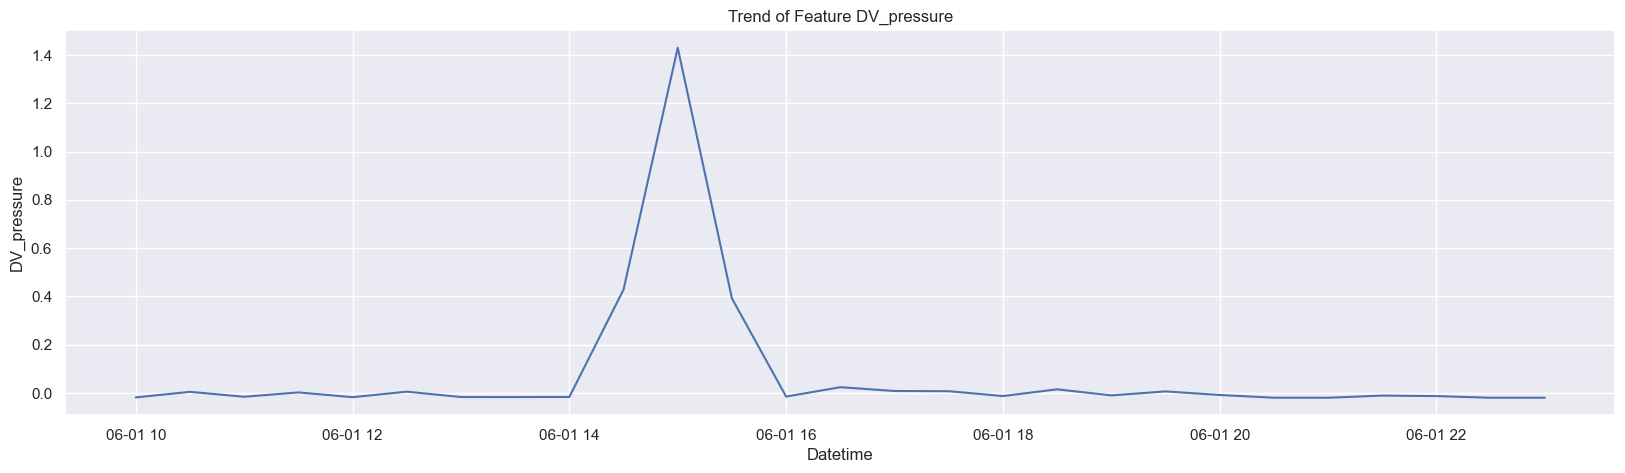

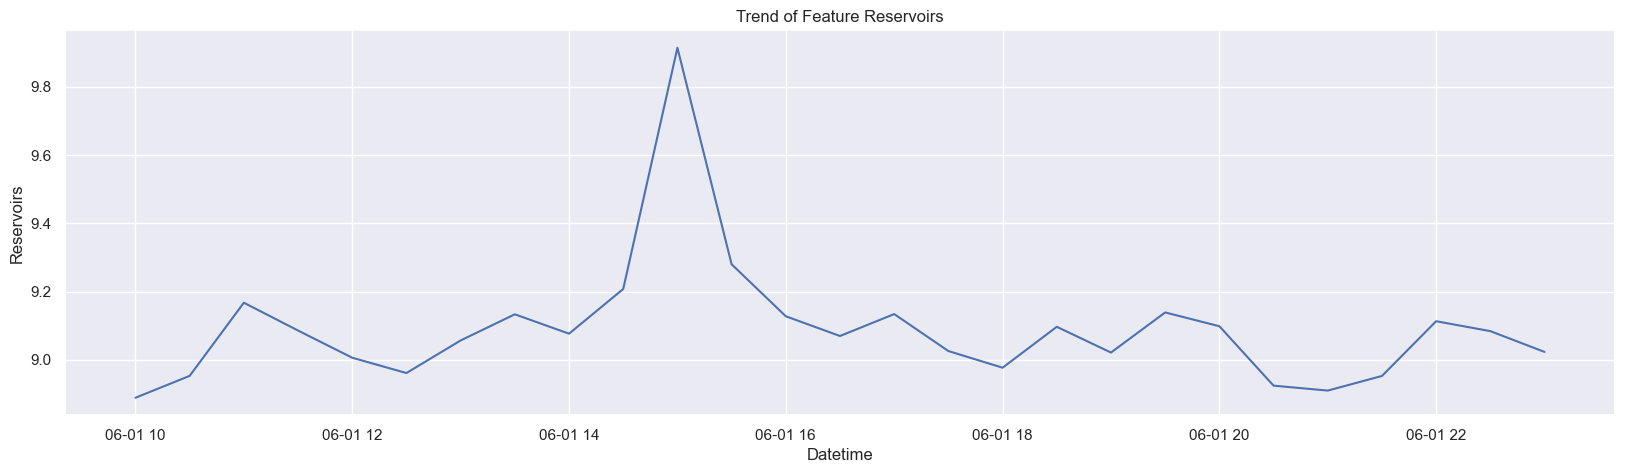

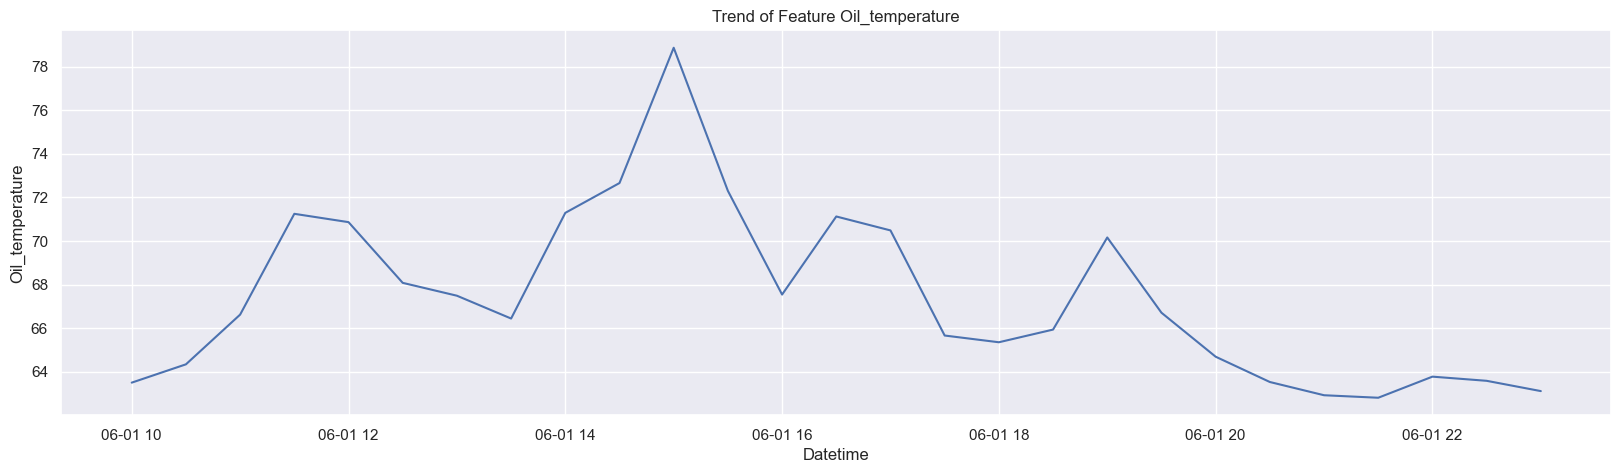

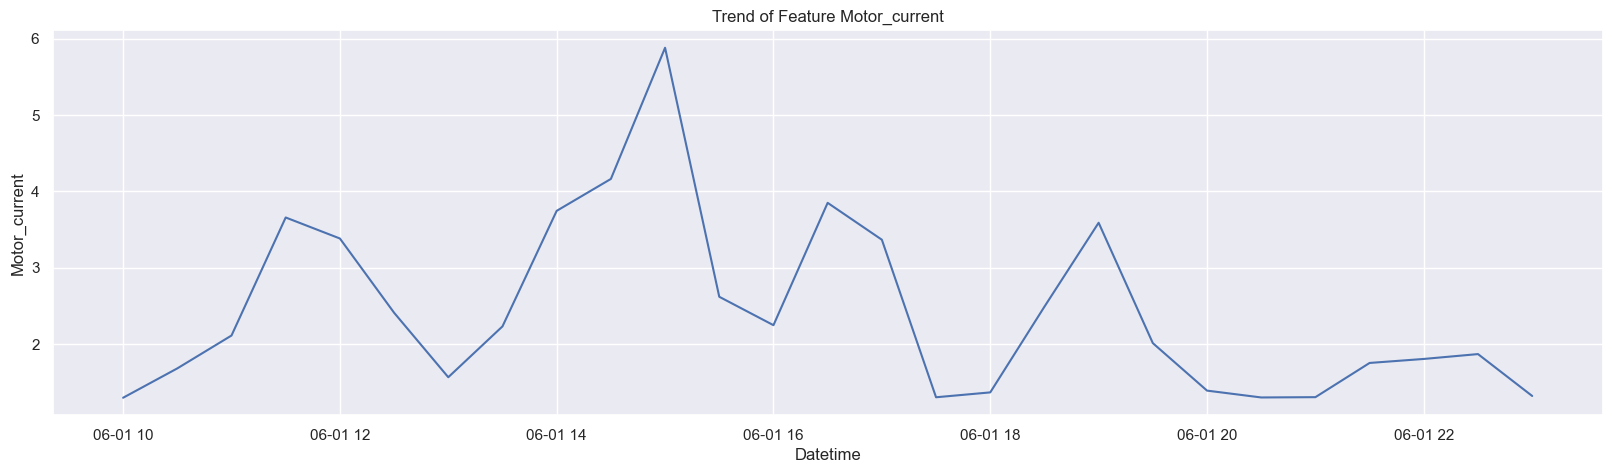

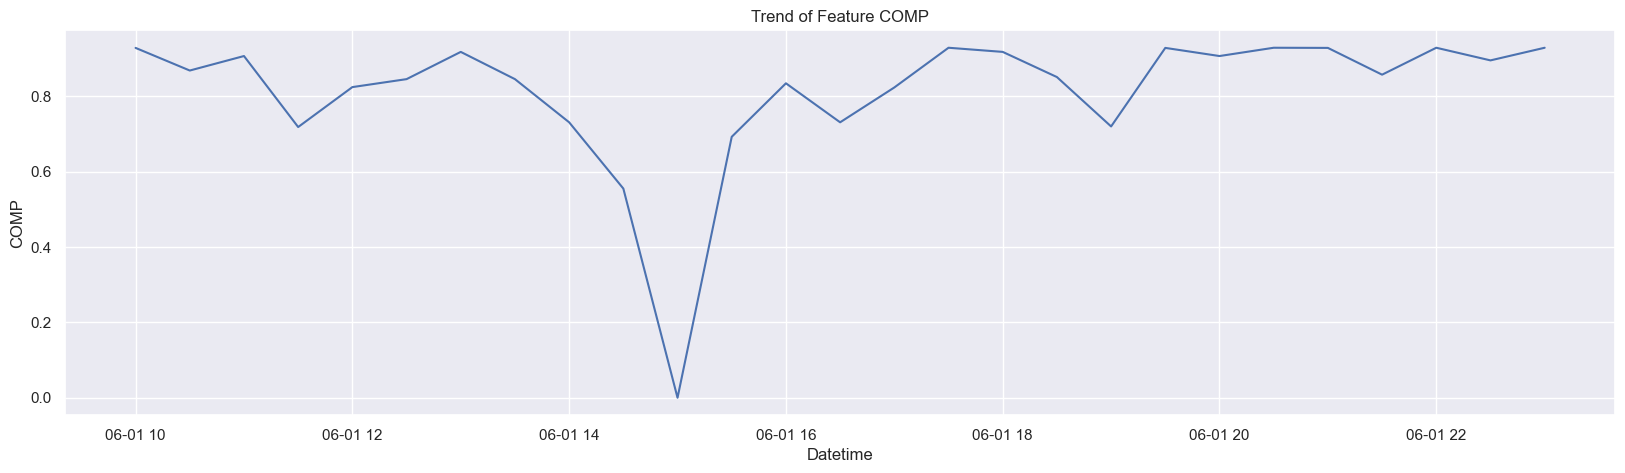

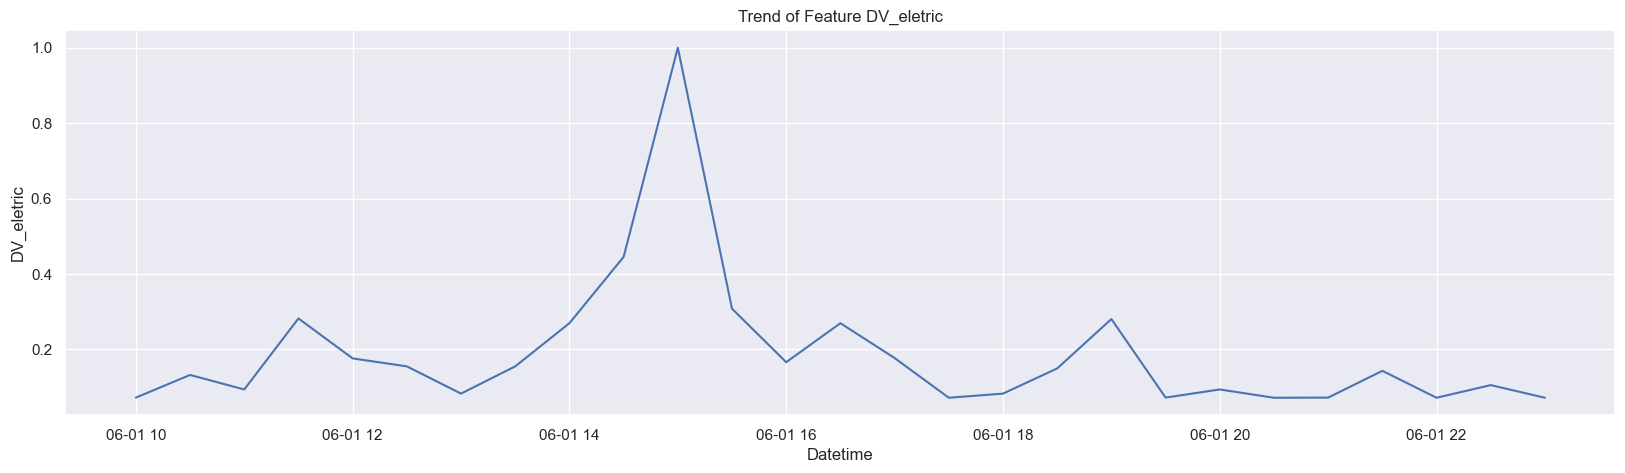

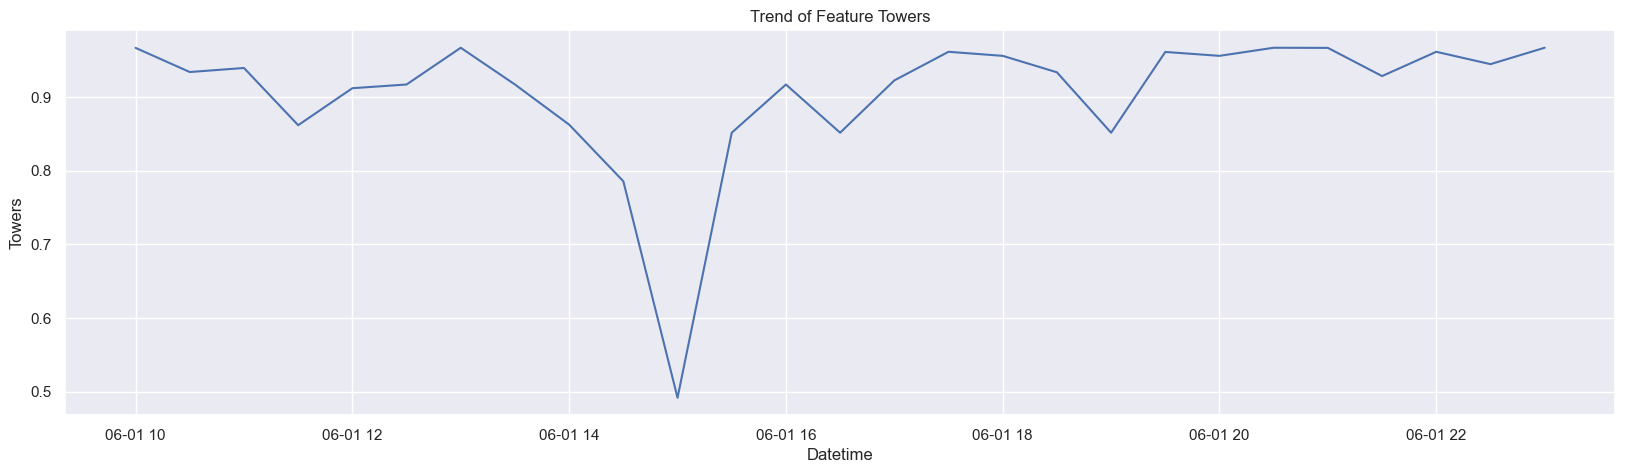

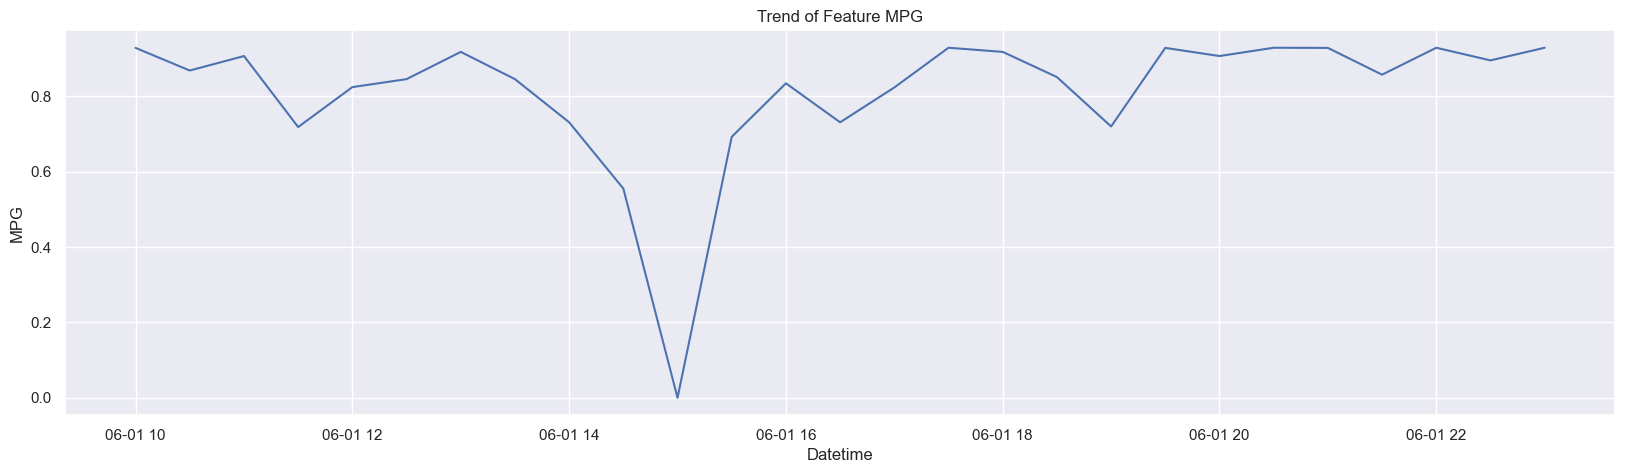

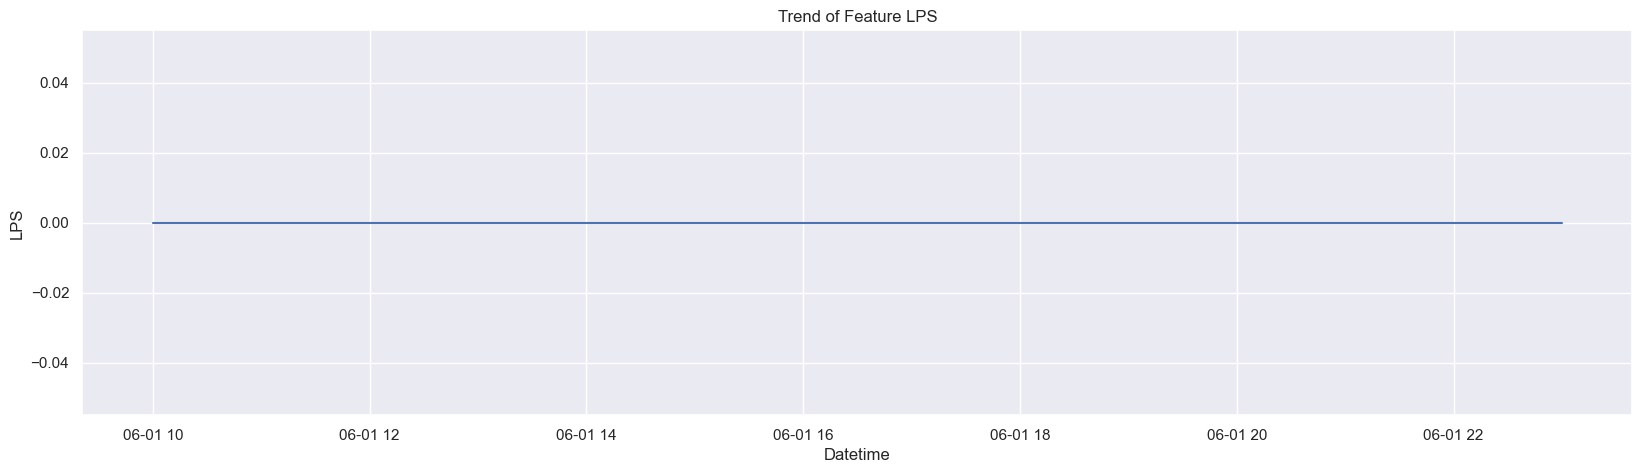

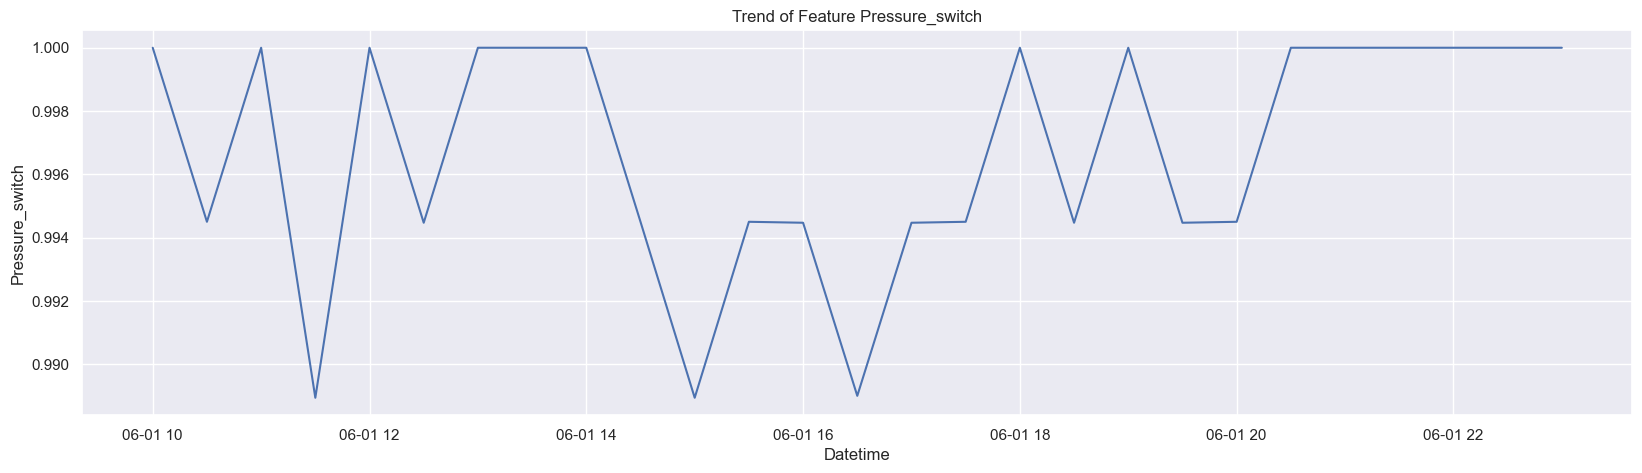

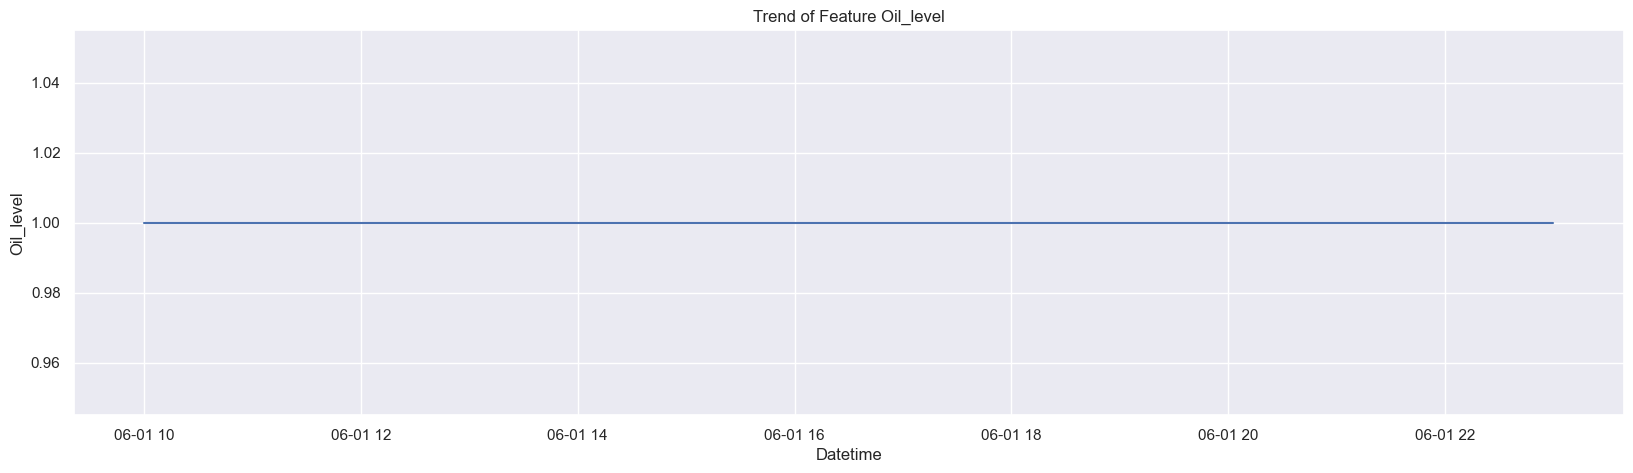

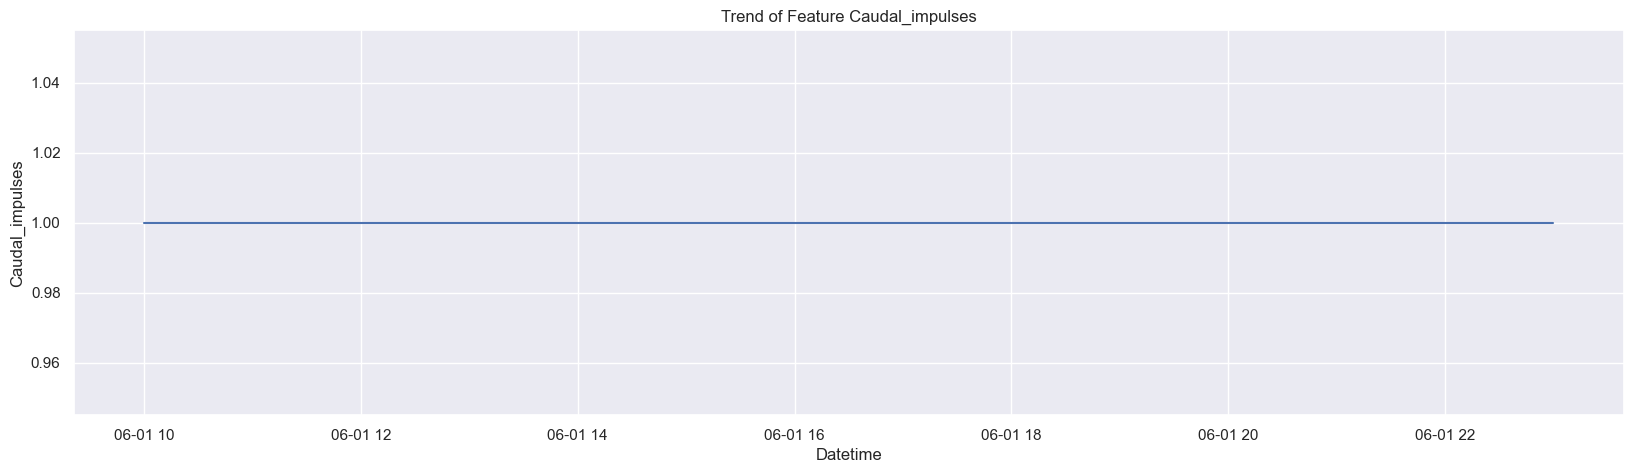

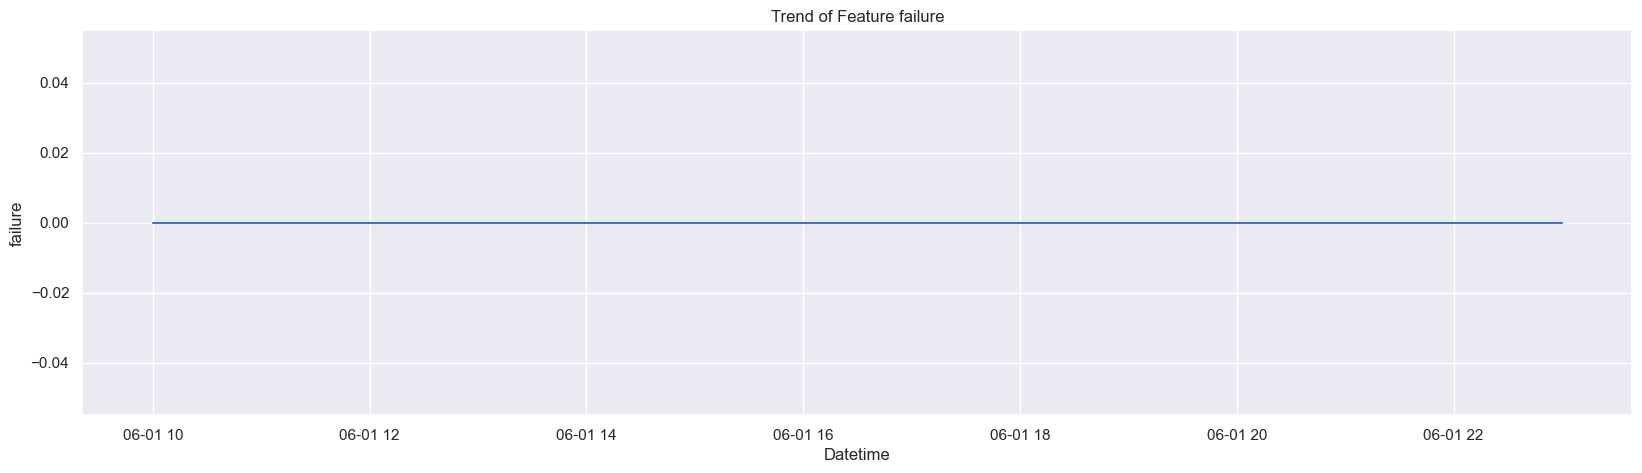

In [188]:
plot_data(df, start=datetime(2020,6,1,10,0), end=datetime(2020,6,1,23,0))

#### Another Failure Day Trend

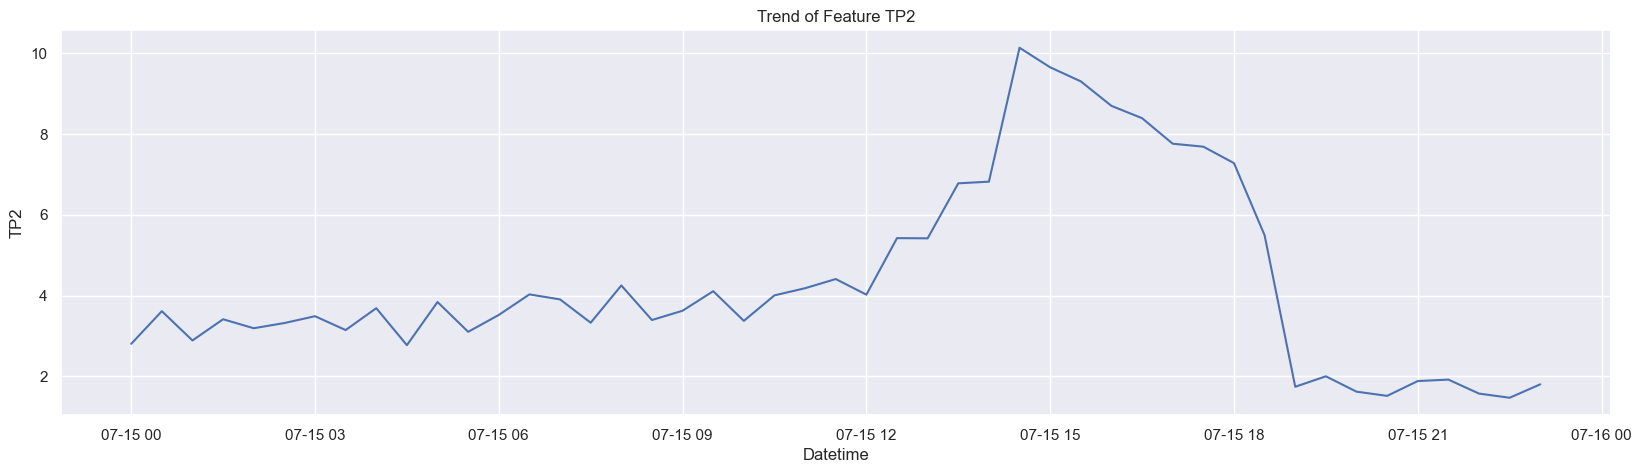

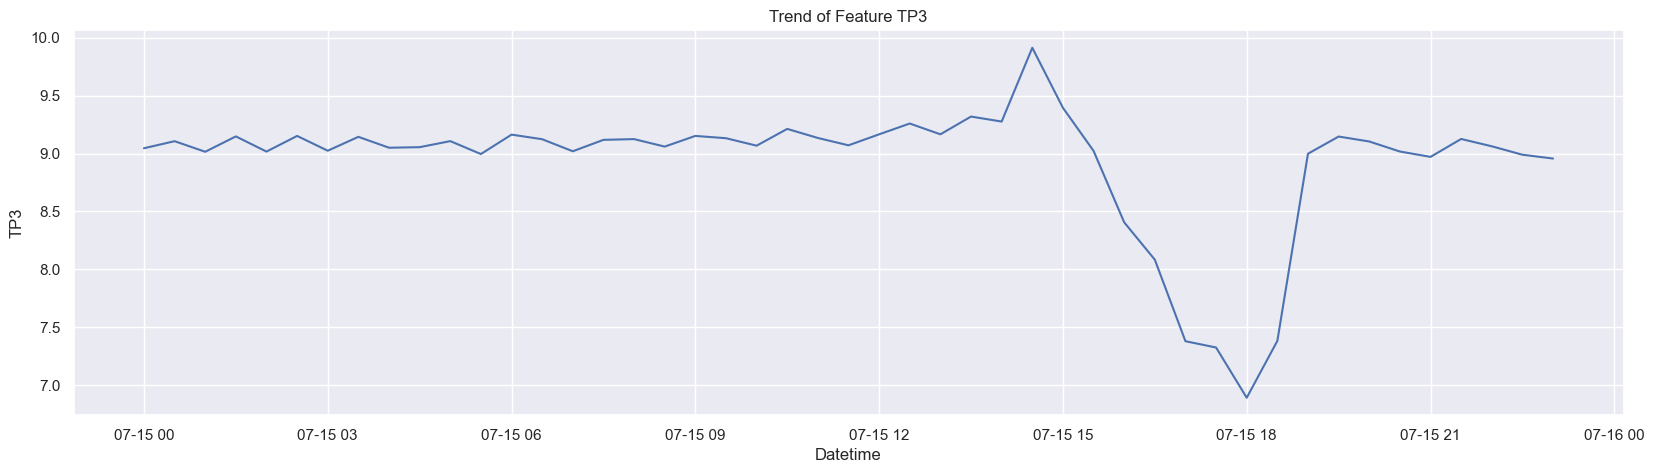

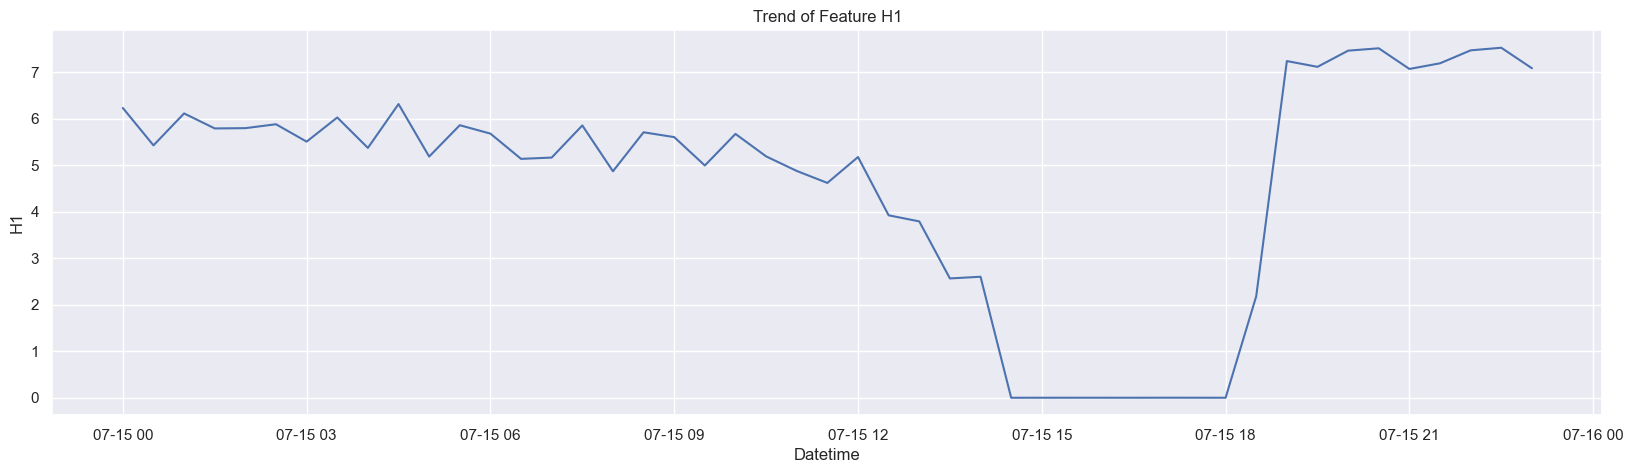

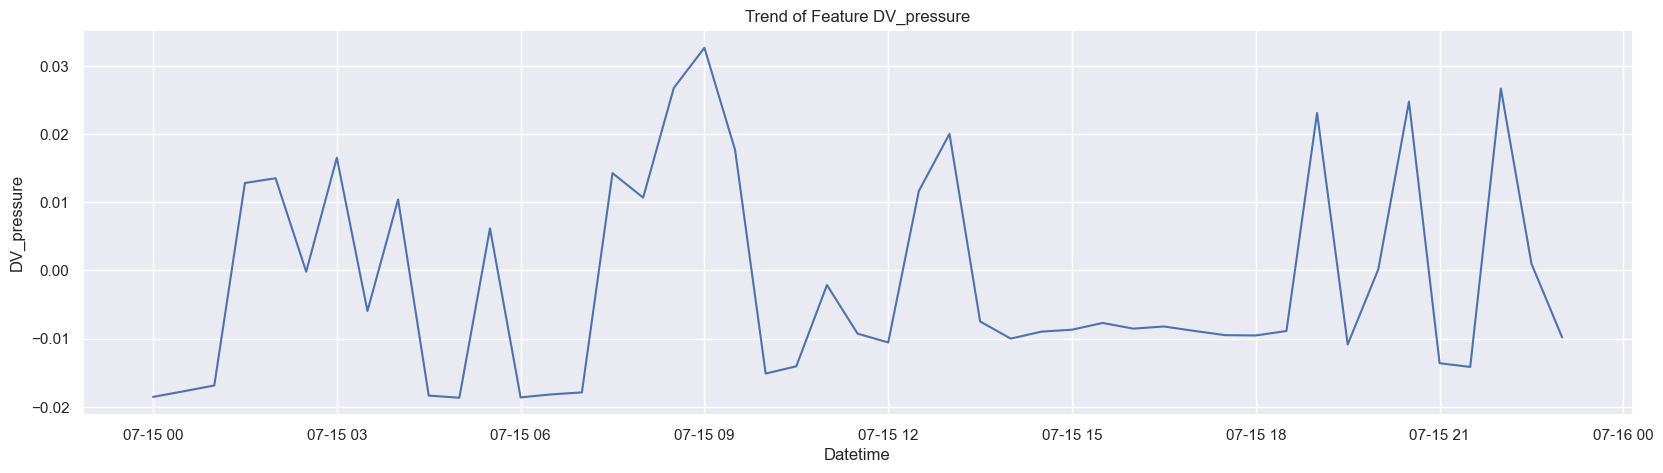

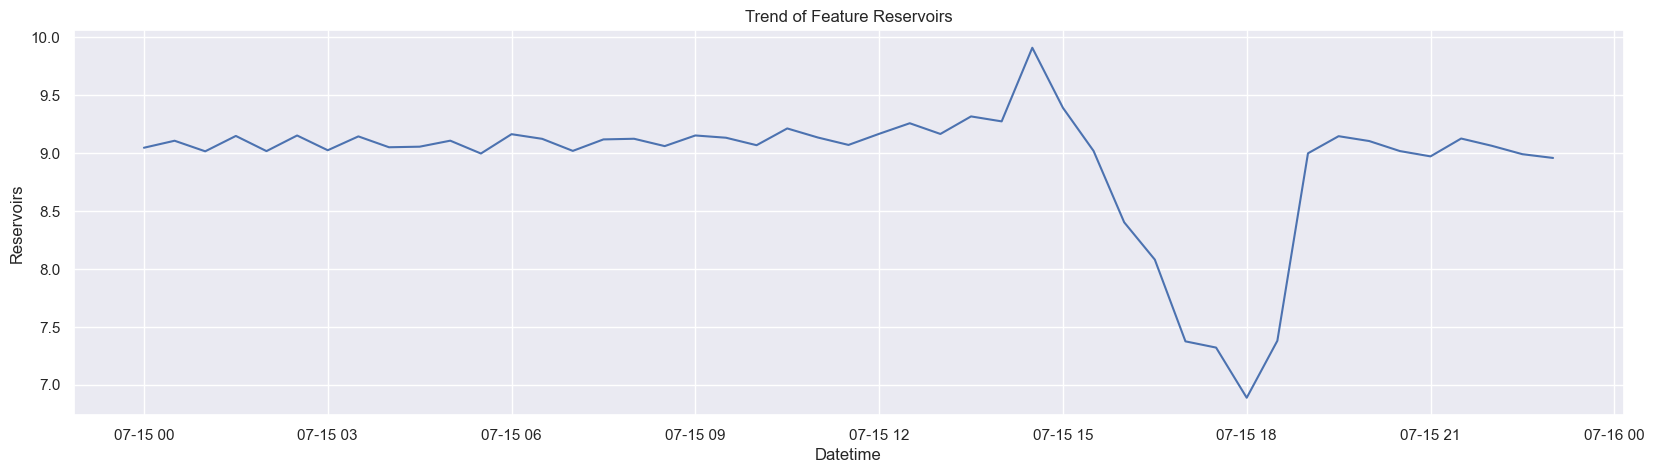

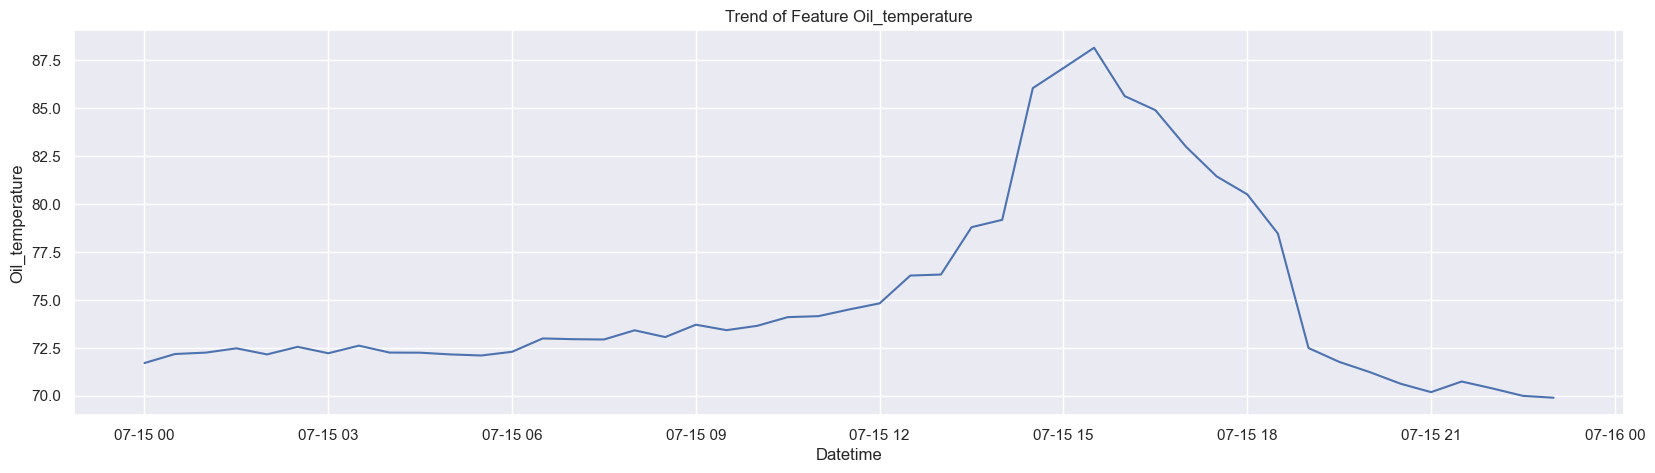

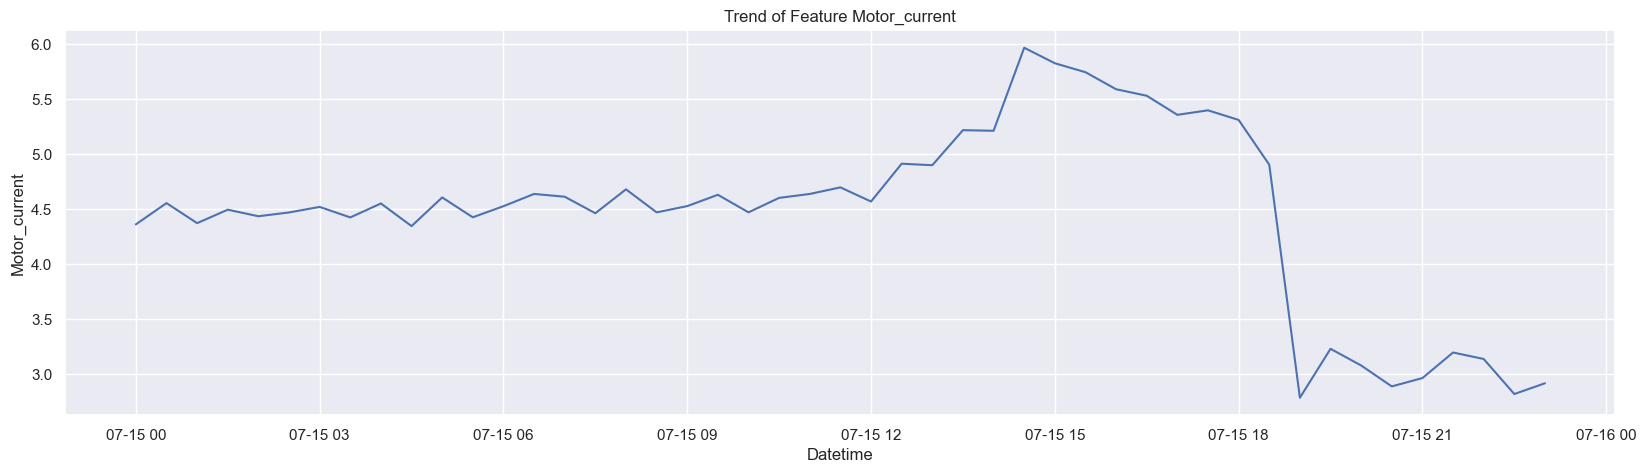

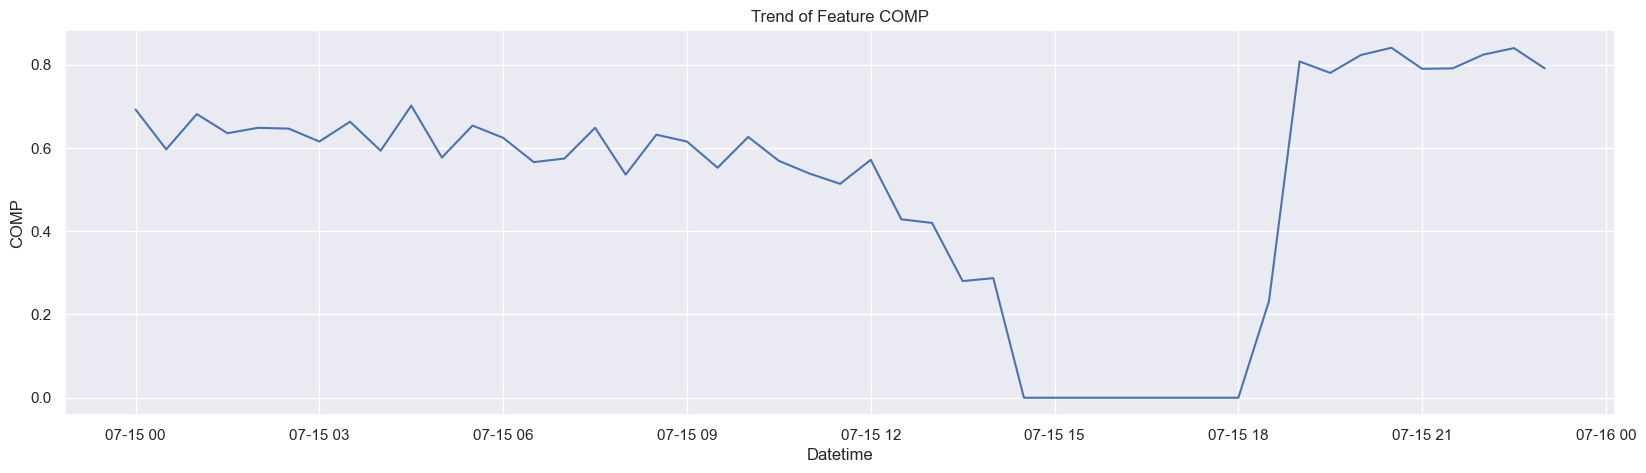

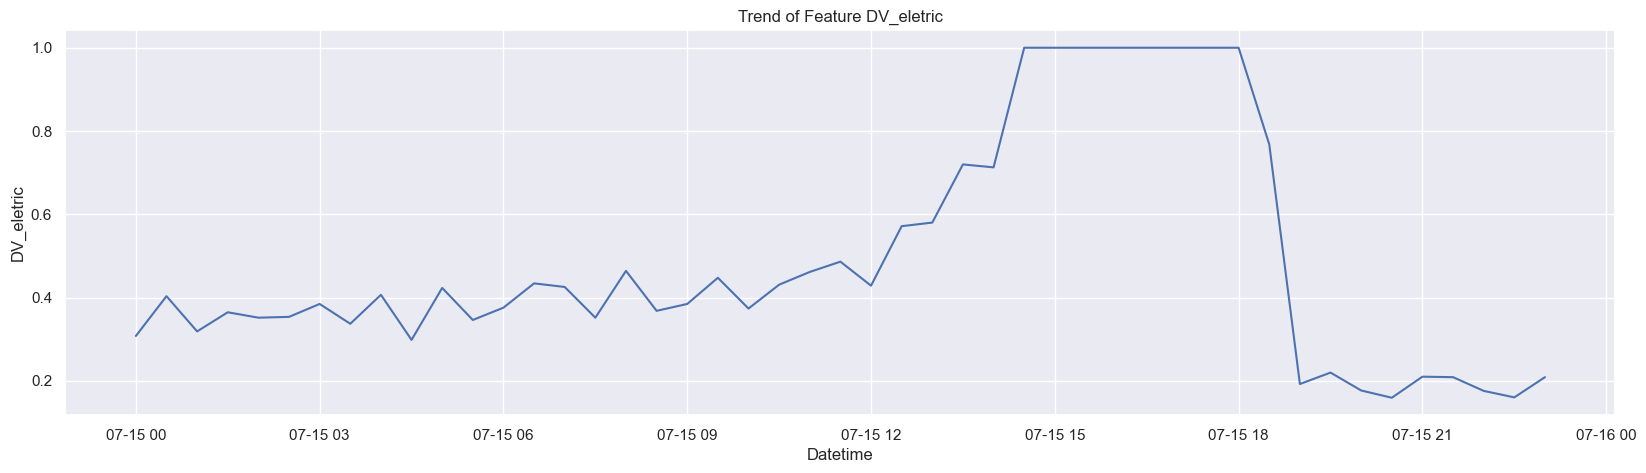

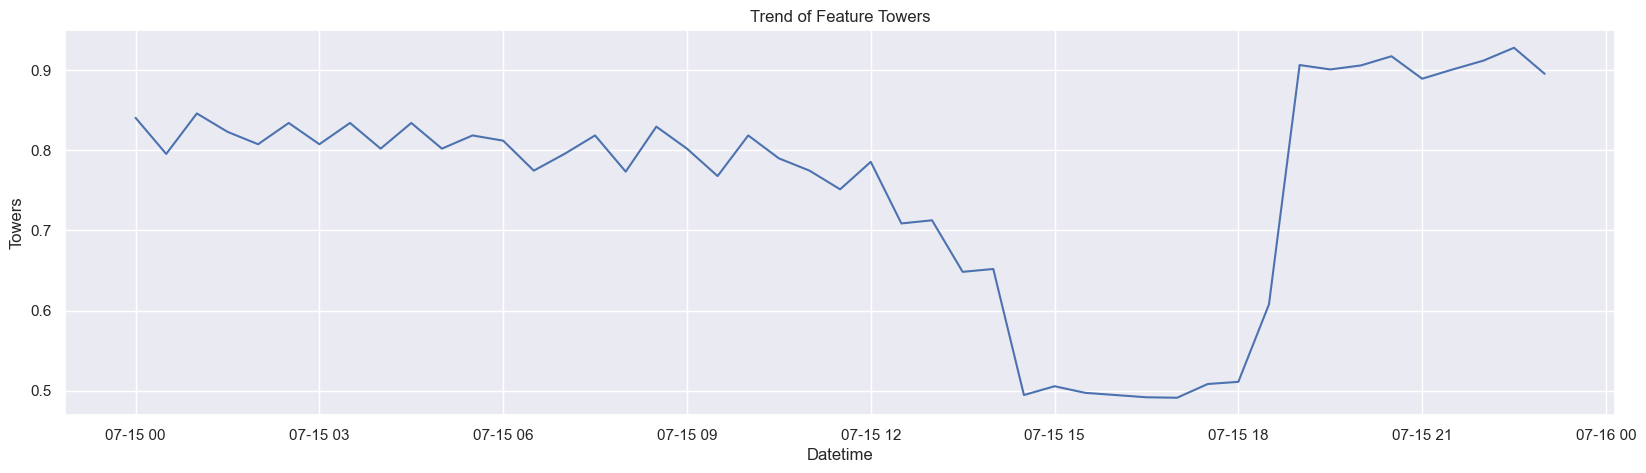

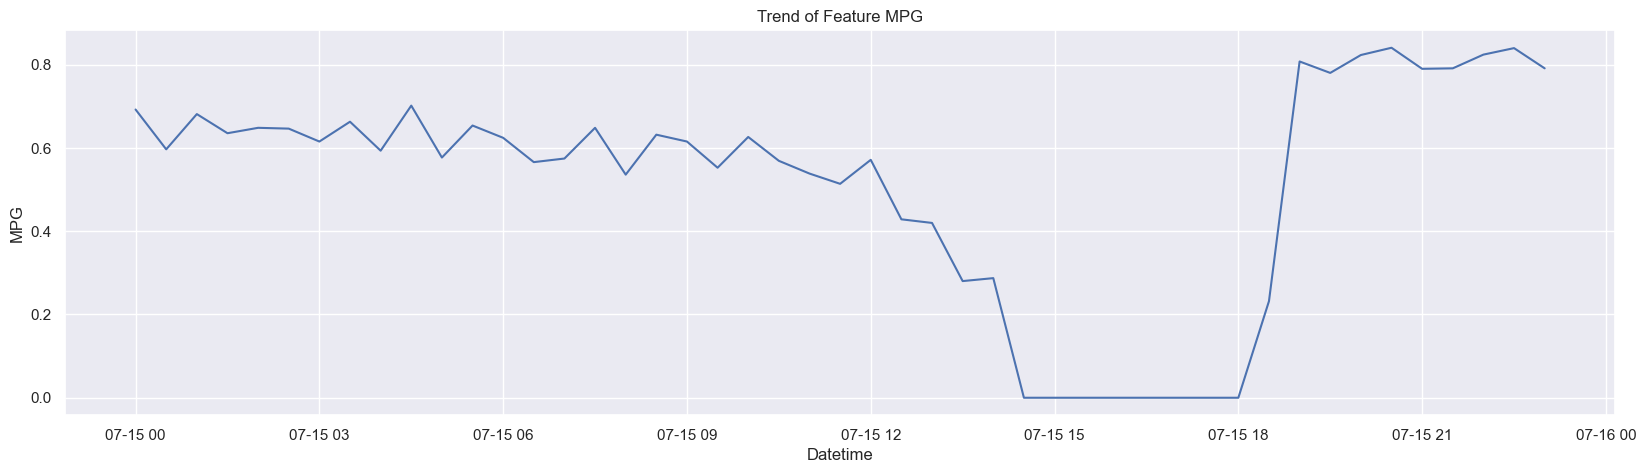

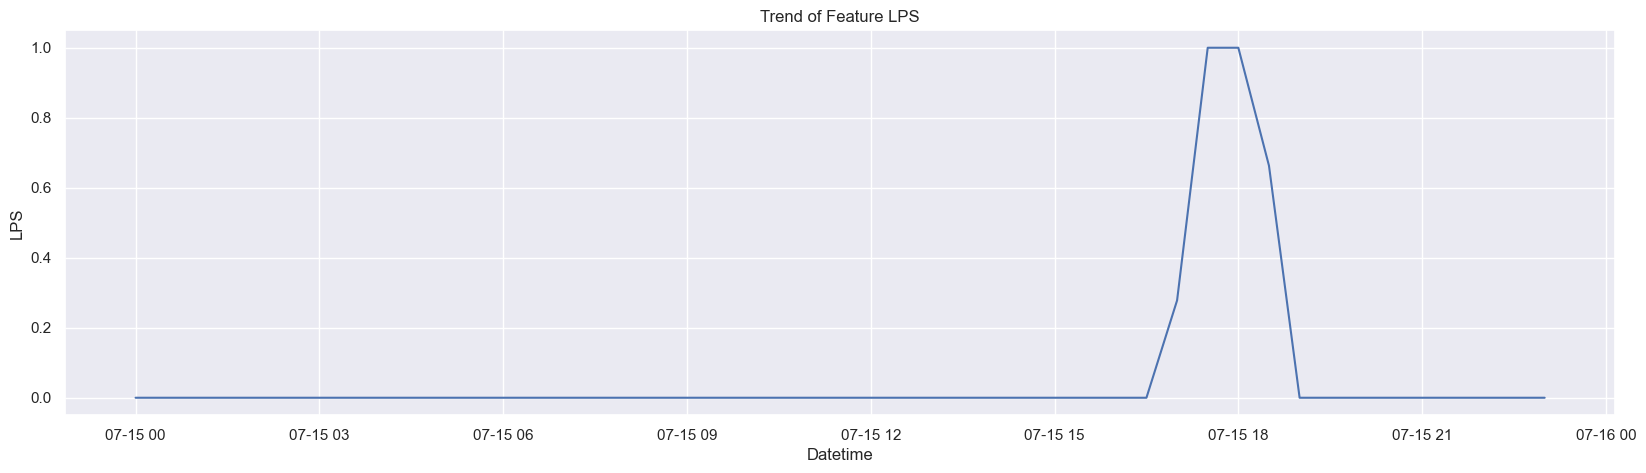

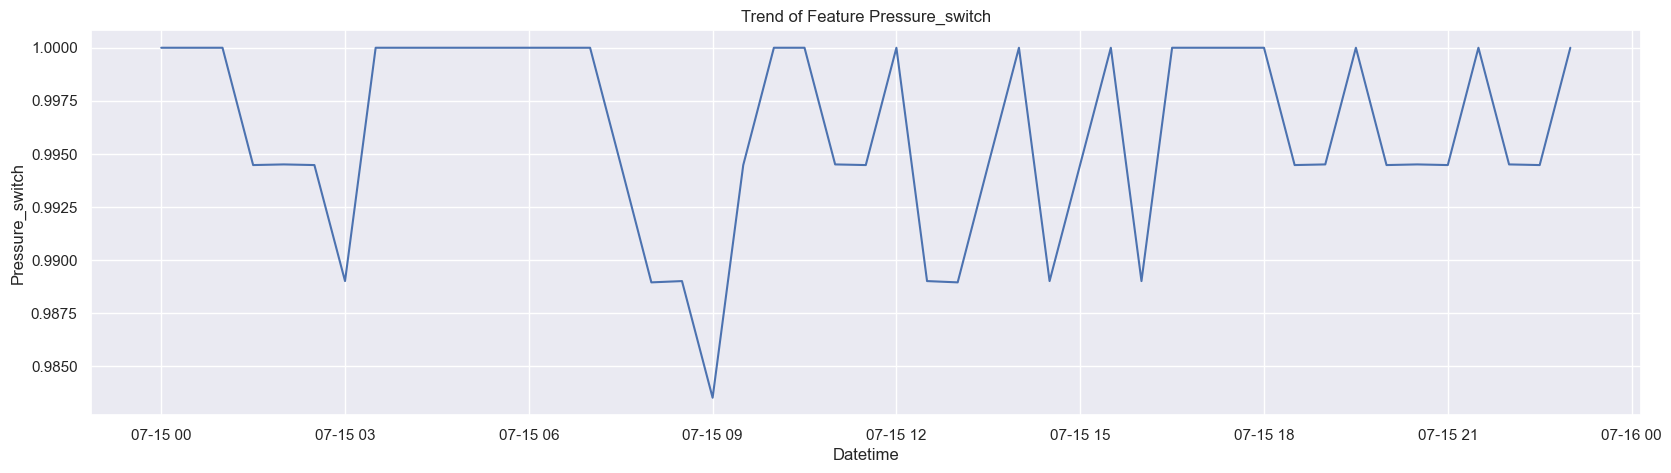

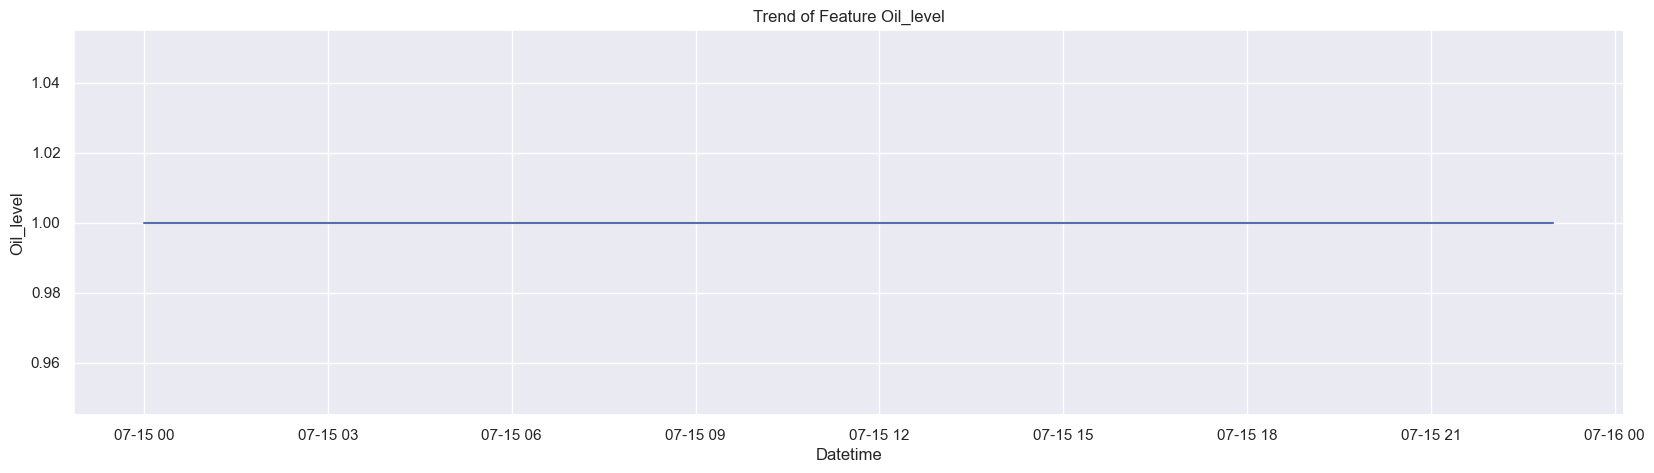

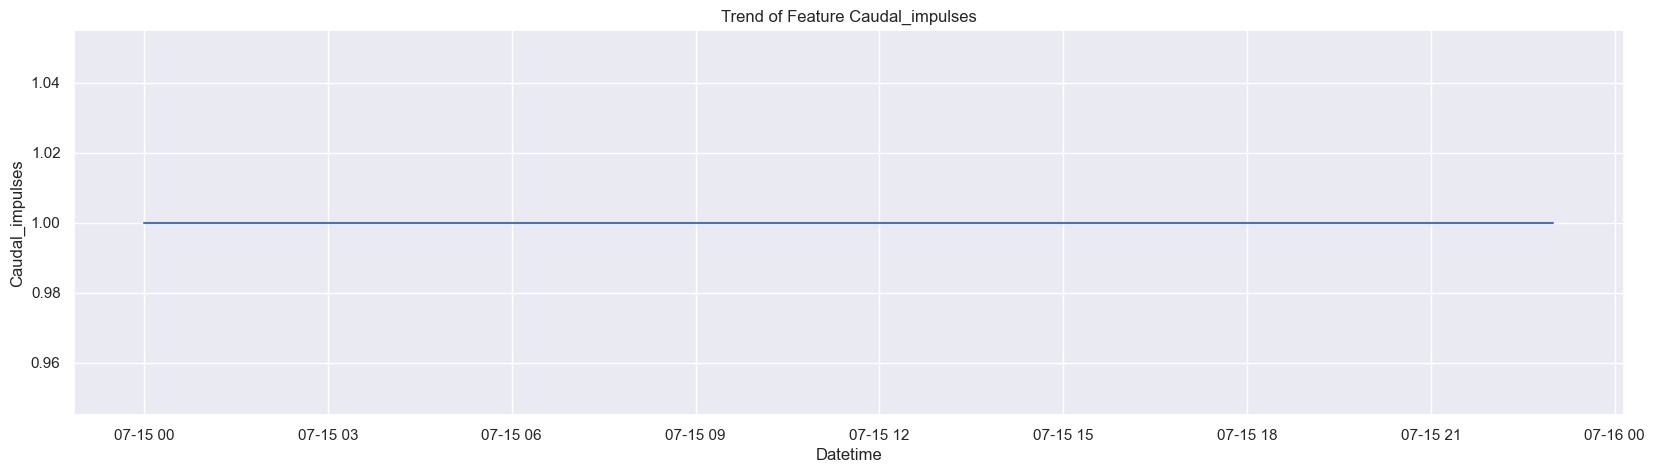

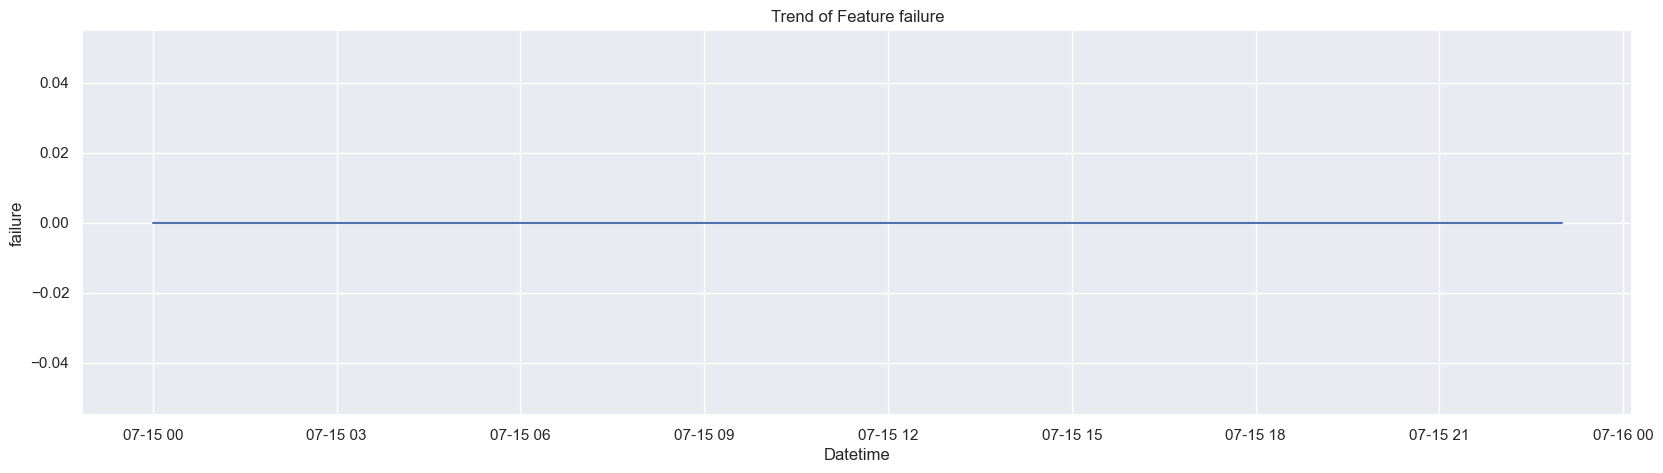

In [190]:
plot_data(df, start=datetime(2020,7,15,0,0), end=datetime(2020,7,15,23,0))

We can observe that the Trends at fault time are different from normal, specially in features TP2, TP3, H1, DV_Prssure, Reservoirs, Oil_Temperature, Motor_Current, DV Electric, Towers, MPG

#### Correlation matrix

In [9]:
# Label Creation based on provided failure information
failure_times_reg = [
    ('2020-04-12 11:50:00', '2020-04-12 23:30:00'),
    ('2020-04-18 00:00:00', '2020-04-18 23:59:00'),
    ('2020-04-19 00:00:00', '2020-04-19 01:30:00'),
    ('2020-04-29 03:20:00', '2020-04-29 04:00:00'),
    ('2020-04-29 22:00:00', '2020-04-29 22:20:00'),
    ('2020-05-13 14:00:00', '2020-05-13 23:59:00'),
    ('2020-05-18 05:00:00', '2020-05-18 05:30:00'),
    ('2020-05-19 10:10:00', '2020-05-19 11:00:00'),
    ('2020-05-19 22:10:00', '2020-05-19 23:59:00'),
    ('2020-05-20 00:00:00', '2020-05-20 20:00:00'),
    ('2020-05-23 09:50:00', '2020-05-23 10:10:00'),
    ('2020-05-29 23:30:00', '2020-05-29 23:59:00'),
    ('2020-05-30 00:00:00', '2020-05-30 06:00:00'),
    ('2020-06-01 15:00:00', '2020-06-01 15:40:00'),
    ('2020-06-03 10:00:00', '2020-06-03 11:00:00'),
    ('2020-06-05 10:00:00', '2020-06-05 23:59:00'),
    ('2020-06-06 00:00:00', '2020-06-06 23:59:00'),
    ('2020-06-07 00:00:00', '2020-06-07 14:30:00'),
    ('2020-07-08 17:30:00', '2020-07-08 19:00:00'),
    ('2020-07-15 14:30:00', '2020-07-15 19:00:00'),
    ('2020-07-17 04:30:00', '2020-07-17 05:30:00')
]

data_normal_target = data.copy()

data_normal_target['failure'] = 0
for start, end in failure_times_reg:
    data_normal_target.loc[start:end, 'failure'] = 1
data_normal_target


TP2    TP3     H1  DV_pressure  Reservoirs  \
timestamp                                                           
2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024       9.358   
2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022       9.348   
2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022       9.338   
2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022       9.328   
2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022       9.318   
...                    ...    ...    ...          ...         ...   
2020-09-01 03:59:10 -0.014  8.918  8.906       -0.022       8.918   
2020-09-01 03:59:20 -0.014  8.904  8.888       -0.020       8.904   
2020-09-01 03:59:30 -0.014  8.890  8.876       -0.022       8.892   
2020-09-01 03:59:40 -0.012  8.876  8.864       -0.022       8.878   
2020-09-01 03:59:50 -0.014  8.860  8.848       -0.022       8.864   

                     Oil_temperature  Motor_current  COMP  DV_eletric  Towers  \
timestamp                                                                       
2020-02-01 00:00:00           53.600         0.0400   1.0         0.0     1.0   
2020-02-01 00:00:10           53.675         0.0400   1.0         0.0     1.0   
2020-02-01 00:00:19           53.600         0.0425   1.0         0.0     1.0   
2020-02-01 00:00:29           53.425         0.0400   1.0         0.0     1.0   
2020-02-01 00:00:39           53.475         0.0400   1.0         0.0     1.0   
...                              ...            ...   ...         ...     ...   
2020-09-01 03:59:10           59.675         0.0425   1.0         0.0     1.0   
2020-09-01 03:59:20           59.600         0.0450   1.0         0.0     1.0   
2020-09-01 03:59:30           59.600         0.0425   1.0         0.0     1.0   
2020-09-01 03:59:40           59.550         0.0450   1.0         0.0     1.0   
2020-09-01 03:59:50           59.475         0.0425   1.0         0.0     1.0   

                     MPG  LPS  Pressure_switch  Oil_level  Caudal_impulses  \
timestamp                                                                    
2020-02-01 00:00:00  1.0  0.0              1.0        1.0              1.0   
2020-02-01 00:00:10  1.0  0.0              1.0        1.0              1.0   
2020-02-01 00:00:19  1.0  0.0              1.0        1.0              1.0   
2020-02-01 00:00:29  1.0  0.0              1.0        1.0              1.0   
2020-02-01 00:00:39  1.0  0.0              1.0        1.0              1.0   
...                  ...  ...              ...        ...              ...   
2020-09-01 03:59:10  1.0  0.0              1.0        1.0              1.0   
2020-09-01 03:59:20  1.0  0.0              1.0        1.0              1.0   
2020-09-01 03:59:30  1.0  0.0              1.0        1.0              1.0   
2020-09-01 03:59:40  1.0  0.0              1.0        1.0              1.0   
2020-09-01 03:59:50  1.0  0.0              1.0        1.0              1.0   

                     failure  
timestamp                     
2020-02-01 00:00:00        0  
2020-02-01 00:00:10        0  
2020-02-01 00:00:19        0  
2020-02-01 00:00:29        0  
2020-02-01 00:00:39        0  
...                      ...  
2020-09-01 03:59:10        0  
2020-09-01 03:59:20        0  
2020-09-01 03:59:30        0  
2020-09-01 03:59:40        0  
2020-09-01 03:59:50        0  

[1516948 rows x 16 columns]

In [16]:
data_normal_target['failure'].value_counts()

failure
0    1468327
1      48621
Name: count, dtype: int64

Here we can see it is a highly imbalanced class

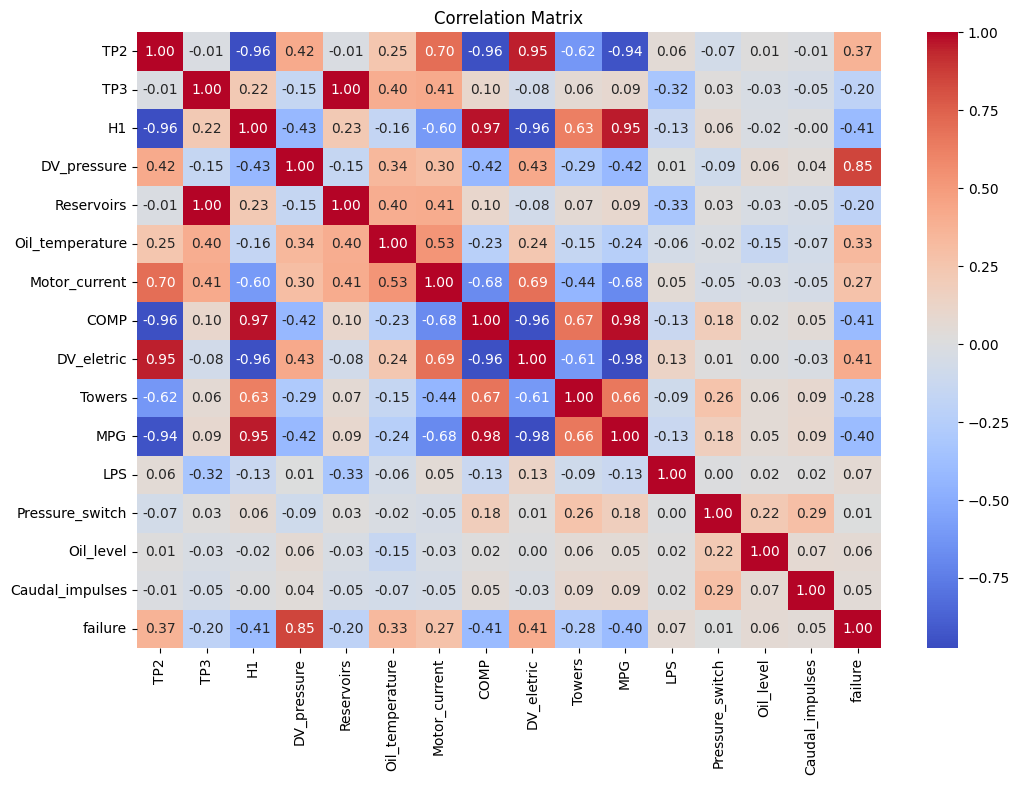

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_normal_target.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

You can observe that 'LPS', 'Caudal_impulses', 'Oil_level', 'Pressure_switch' all havve the lowest correlation to the target

#### Univariate Analysis

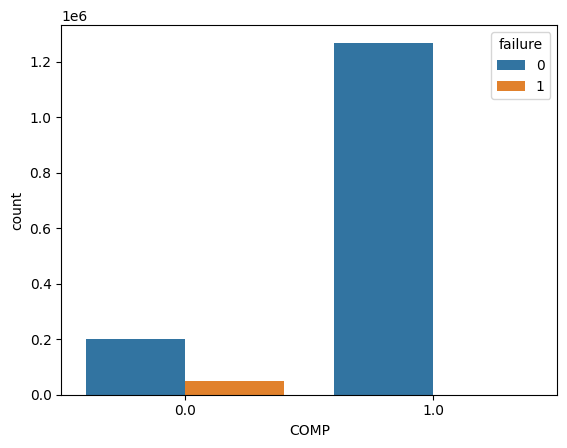

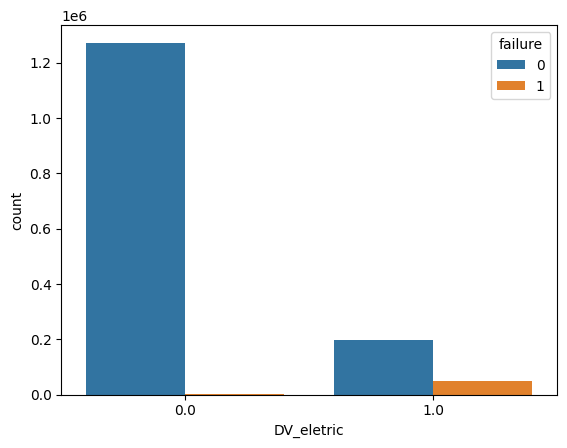

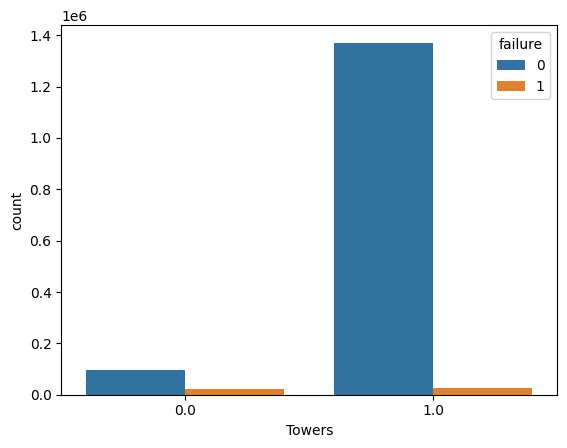

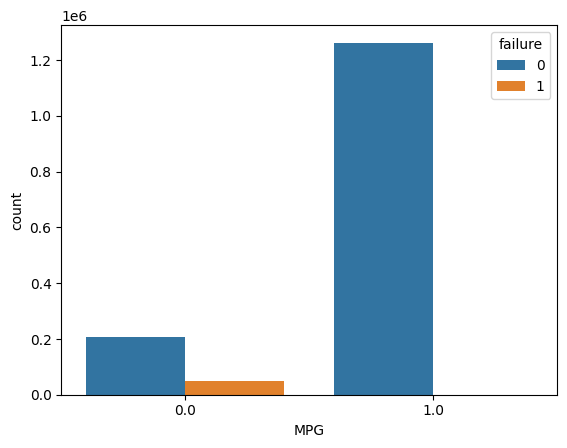

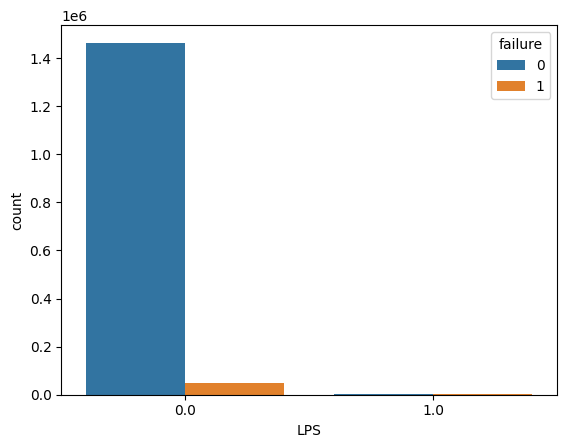

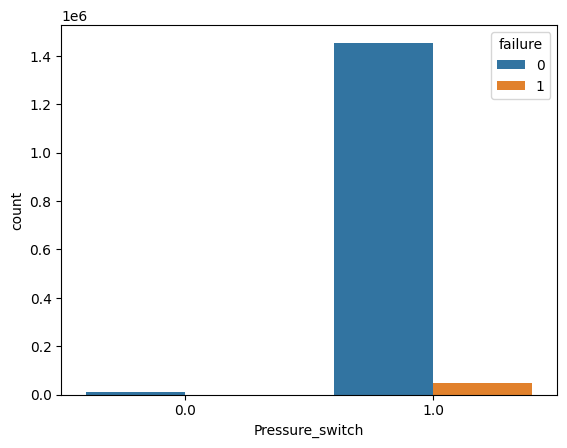

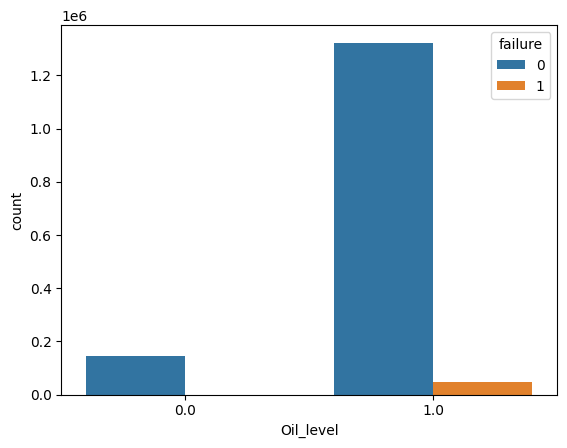

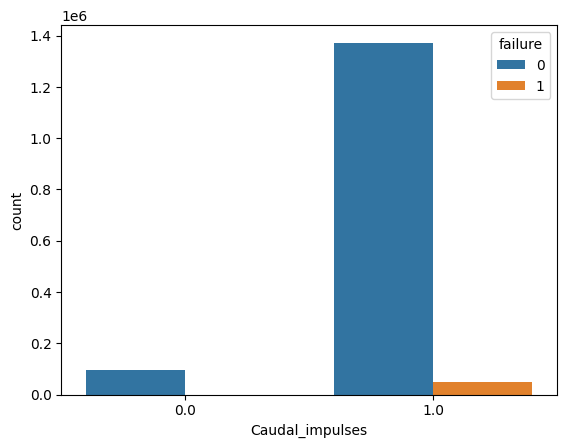

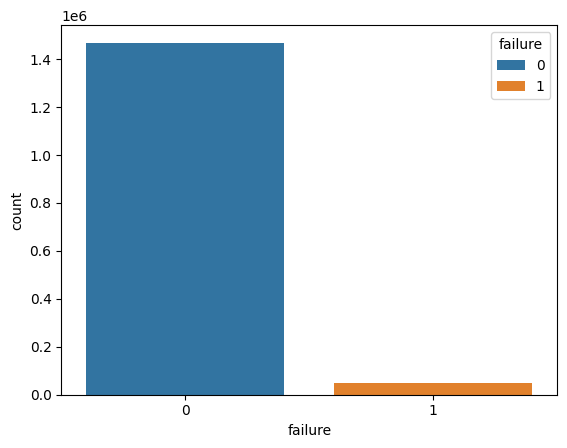

In [18]:
numerical_features = []
categorical_features = []
for column in data_normal_target.columns:
    if len(data_normal_target[column].unique()) < 5:
        categorical_features.append(column)
    else:
        numerical_features.append(column)

for column in categorical_features:
    sns.countplot(data=data_normal_target, x=column, hue='failure')
    plt.show()

# Feature Engineering 

### Label Creation based on provided failure information with the includion of the previous day(24 hrs)

Here we will be creating label from the failures reported from April to July 2020 provided by the expert as mentioned in the original paper. We will create a new column where 1 day before the timeframe as well as the timeframe indicated in the paper is labeled as unhealthy data i.e. 1 healthy data is set as 0. sed for training neural network

In [111]:

failure_times = [
    ('2020-04-11 11:50:00', '2020-04-12 23:30:00'),
    ('2020-04-17 00:00:00', '2020-04-19 01:30:00'),
    ('2020-04-28 03:20:00', '2020-04-29 22:20:00'),
    ('2020-05-12 14:00:00', '2020-05-13 23:59:00'),
    ('2020-05-17 05:00:00', '2020-05-20 20:00:00'),
    ('2020-05-28 23:30:00', '2020-05-30 06:00:00'),
    ('2020-05-31 15:00:00', '2020-06-01 15:40:00'),
    ('2020-06-02 10:00:00', '2020-06-03 11:00:00'),
    ('2020-06-04 10:00:00', '2020-06-07 14:30:00'),
    ('2020-07-07 17:30:00', '2020-07-08 19:00:00'),
    ('2020-07-14 14:30:00', '2020-07-15 19:00:00'),
    ('2020-07-16 04:30:00', '2020-07-17 05:30:00')
]

In [112]:
data_with_24hrs_target = data.copy()
data_with_24hrs_target['failure'] = 0
for start, end in failure_times:
    data_with_24hrs_target.loc[start:end, 'failure'] = 1
data_with_24hrs_target


TP2    TP3     H1  DV_pressure  Reservoirs  \
timestamp                                                           
2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024       9.358   
2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022       9.348   
2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022       9.338   
2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022       9.328   
2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022       9.318   
...                    ...    ...    ...          ...         ...   
2020-09-01 03:59:10 -0.014  8.918  8.906       -0.022       8.918   
2020-09-01 03:59:20 -0.014  8.904  8.888       -0.020       8.904   
2020-09-01 03:59:30 -0.014  8.890  8.876       -0.022       8.892   
2020-09-01 03:59:40 -0.012  8.876  8.864       -0.022       8.878   
2020-09-01 03:59:50 -0.014  8.860  8.848       -0.022       8.864   

                     Oil_temperature  Motor_current  COMP  DV_eletric  Towers  \
timestamp                                                                       
2020-02-01 00:00:00           53.600         0.0400   1.0         0.0     1.0   
2020-02-01 00:00:10           53.675         0.0400   1.0         0.0     1.0   
2020-02-01 00:00:19           53.600         0.0425   1.0         0.0     1.0   
2020-02-01 00:00:29           53.425         0.0400   1.0         0.0     1.0   
2020-02-01 00:00:39           53.475         0.0400   1.0         0.0     1.0   
...                              ...            ...   ...         ...     ...   
2020-09-01 03:59:10           59.675         0.0425   1.0         0.0     1.0   
2020-09-01 03:59:20           59.600         0.0450   1.0         0.0     1.0   
2020-09-01 03:59:30           59.600         0.0425   1.0         0.0     1.0   
2020-09-01 03:59:40           59.550         0.0450   1.0         0.0     1.0   
2020-09-01 03:59:50           59.475         0.0425   1.0         0.0     1.0   

                     MPG  LPS  Pressure_switch  Oil_level  Caudal_impulses  \
timestamp                                                                    
2020-02-01 00:00:00  1.0  0.0              1.0        1.0              1.0   
2020-02-01 00:00:10  1.0  0.0              1.0        1.0              1.0   
2020-02-01 00:00:19  1.0  0.0              1.0        1.0              1.0   
2020-02-01 00:00:29  1.0  0.0              1.0        1.0              1.0   
2020-02-01 00:00:39  1.0  0.0              1.0        1.0              1.0   
...                  ...  ...              ...        ...              ...   
2020-09-01 03:59:10  1.0  0.0              1.0        1.0              1.0   
2020-09-01 03:59:20  1.0  0.0              1.0        1.0              1.0   
2020-09-01 03:59:30  1.0  0.0              1.0        1.0              1.0   
2020-09-01 03:59:40  1.0  0.0              1.0        1.0              1.0   
2020-09-01 03:59:50  1.0  0.0              1.0        1.0              1.0   

                     failure  
timestamp                     
2020-02-01 00:00:00        0  
2020-02-01 00:00:10        0  
2020-02-01 00:00:19        0  
2020-02-01 00:00:29        0  
2020-02-01 00:00:39        0  
...                      ...  
2020-09-01 03:59:10        0  
2020-09-01 03:59:20        0  
2020-09-01 03:59:30        0  
2020-09-01 03:59:40        0  
2020-09-01 03:59:50        0  

[1516948 rows x 16 columns]

In [ ]:
# # Data Preprocessing
# data = data.resample('30min').mean().interpolate()
# data

In [29]:
# data = data.drop(['LPS', 'Caudal_impulses', 'Oil_level', 'Pressure_switch'], axis=1)
# data['LPS'].value_counts(), data['Caudal_impulses'].value_counts(), data['Oil_level'].value_counts(), data['Pressure_switch'].value_counts()
# data['failure'].value_counts()

Idea Behind Creating Lag Features:
Lag features are used to capture the temporal dependencies in time series data. They represent the values of a feature at previous time steps. By including lag features, we allow the model to learn patterns and trends over time, which can be crucial for predictive tasks such as predicting maintenance needs and estimating remaining useful life (RUL).

Why Use a Range of 25:
The choice of 25 lag features means we are looking at the past 25 hours of data (assuming the data is resampled to hourly intervals). This range is chosen to capture sufficient historical information that might affect the current state of the equipment. The exact number of lags can be tuned based on domain knowledge or experimentation, but 25 is a reasonable starting point for capturing short to medium-term trends.

Why Use Only Oil_temperature:
In this example, Oil_temperature is chosen for simplicity and illustration purposes. However, ideally, we would create lag features for multiple relevant sensors that might influence the equipment's performance. Oil_temperature is a critical feature because fluctuations in oil temperature can be an indicator of mechanical issues or inefficiencies in the system.

Detailed Steps:
Temporal Dependencies: By looking at past values, we help the model understand how previous states influence the current state.
Trend Analysis: Lag features help in identifying trends, such as increasing or decreasing patterns, which are crucial for maintenance prediction.
Data Enrichment: Including lag features enriches the dataset, providing more information for the model to learn from.

In [ ]:
# for lag in range(1, 25):
#     data[f'lag_{lag}'] = data['Oil_temperature'].shift(lag)
# data.dropna(inplace=True)

### Generate new dataset for Calculating mean and standard deviation over the past 60 observations (10 minutes) to determine Remaining Useful Life

In [10]:

window_size = 60
features = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

data_rul = data.copy()

for feature in features:
    data_rul[f'{feature}_mean'] = data_rul[feature].rolling(window=window_size).mean()
    data_rul[f'{feature}_std'] = data_rul[feature].rolling(window=window_size).std()
    
    
# Drop rows with NaN values generated by rolling statistics
data_rul = data_rul.dropna()


# Convert failure times to datetime objects
failure_times = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in failure_times_reg]

# # Step 3: Create Target Variable - Time to Failure
# data_rul['time_to_failure'] = np.inf

# for idx, row in data_rul.iterrows():
#     for start, end in failure_times_reg:
#         start = pd.to_datetime(start)
#         if idx < start:
#             print(idx)
#             time_to_failure = (start - idx).total_seconds() / 60  # time difference in minutes
#             data_rul.at[idx, 'time_to_failure'] = min(data_rul.at[idx, 'time_to_failure'], time_to_failure)
#             break  
# # Filter out rows where time_to_failure is still inf (i.e., no future failure found)
# data_rul = data_rul[data_rul['time_to_failure'] != np.inf]
# data_rul.to_csv("../dataset/data_rul.csv",index=True)
# Create a new DataFrame to hold the time_to_failure values

time_to_failure_df = pd.DataFrame(index=data_rul.index, columns=['time_to_failure'])
time_to_failure_df['time_to_failure'] = np.inf

# Iterate through the failure times and update the time_to_failure_df
for start, end in failure_times:
    mask = data_rul.index < start
    time_to_failure_df.loc[mask, 'time_to_failure'] = np.minimum(
        time_to_failure_df.loc[mask, 'time_to_failure'],
        (start - data_rul.loc[mask].index).total_seconds() / 60
    )

# Assign the computed time_to_failure values to data_rul
data_rul['time_to_failure'] = time_to_failure_df['time_to_failure']

# Filter out rows where time_to_failure is still inf (i.e., no future failure found)
data_rul = data_rul[data_rul['time_to_failure'] != np.inf]



In [26]:
# Function to create classes
def create_time_to_failure_class(minutes):
    if minutes <= 60:
        return 0
    elif minutes <= 3600:
        return 1
    elif minutes <= 86400:
        return 2
    else:
        return 3

# Apply the function to create a new column 'time_to_failure_class'
data_rul['time_to_failure_class'] = data_rul['time_to_failure'].apply(create_time_to_failure_class)
data_rul

TP2    TP3     H1  DV_pressure  Reservoirs  \
timestamp                                                           
2020-02-01 00:09:45 -0.012  8.768  8.754       -0.024       8.770   
2020-02-01 00:09:55 -0.014  8.760  8.746       -0.022       8.760   
2020-02-01 00:10:04 -0.014  8.750  8.736       -0.024       8.750   
2020-02-01 00:10:14 -0.014  8.740  8.728       -0.022       8.740   
2020-02-01 00:10:24 -0.014  8.732  8.718       -0.024       8.732   
...                    ...    ...    ...          ...         ...   
2020-07-17 01:18:38 -0.010  1.500 -0.006       -0.014       1.496   
2020-07-17 01:18:47 -0.008  1.486 -0.006       -0.014       1.482   
2020-07-17 01:18:57 -0.010  1.472 -0.006       -0.014       1.468   
2020-07-17 01:19:07 -0.010  1.458 -0.008       -0.014       1.454   
2020-07-17 01:19:17 -0.008  1.446 -0.006       -0.014       1.442   

                     Oil_temperature  Motor_current  COMP  DV_eletric  Towers  \
timestamp                                                                       
2020-02-01 00:09:45           52.425          0.040   1.0         0.0     1.0   
2020-02-01 00:09:55           52.425          0.040   1.0         0.0     1.0   
2020-02-01 00:10:04           52.225          0.040   1.0         0.0     1.0   
2020-02-01 00:10:14           52.200          0.040   1.0         0.0     1.0   
2020-02-01 00:10:24           52.300          0.040   1.0         0.0     1.0   
...                              ...            ...   ...         ...     ...   
2020-07-17 01:18:38           64.275          0.025   0.0         1.0     1.0   
2020-07-17 01:18:47           64.325          0.025   0.0         1.0     1.0   
2020-07-17 01:18:57           64.150          0.025   0.0         1.0     0.0   
2020-07-17 01:19:07           64.250          0.025   0.0         1.0     0.0   
2020-07-17 01:19:17           64.150          0.025   0.0         1.0     0.0   

                     ...  LPS_mean   LPS_std  Pressure_switch_mean  \
timestamp            ...                                             
2020-02-01 00:09:45  ...  0.000000  0.000000                   1.0   
2020-02-01 00:09:55  ...  0.000000  0.000000                   1.0   
2020-02-01 00:10:04  ...  0.000000  0.000000                   1.0   
2020-02-01 00:10:14  ...  0.000000  0.000000                   1.0   
2020-02-01 00:10:24  ...  0.000000  0.000000                   1.0   
...                  ...       ...       ...                   ...   
2020-07-17 01:18:38  ...  0.716667  0.454420                   1.0   
2020-07-17 01:18:47  ...  0.733333  0.445948                   1.0   
2020-07-17 01:18:57  ...  0.750000  0.436667                   1.0   
2020-07-17 01:19:07  ...  0.766667  0.426522                   1.0   
2020-07-17 01:19:17  ...  0.783333  0.415450                   1.0   

                     Pressure_switch_std  Oil_level_mean  Oil_level_std  \
timestamp                                                                 
2020-02-01 00:09:45                  0.0             1.0            0.0   
2020-02-01 00:09:55                  0.0             1.0            0.0   
2020-02-01 00:10:04                  0.0             1.0            0.0   
2020-02-01 00:10:14                  0.0             1.0            0.0   
2020-02-01 00:10:24                  0.0             1.0            0.0   
...                                  ...             ...            ...   
2020-07-17 01:18:38                  0.0             1.0            0.0   
2020-07-17 01:18:47                  0.0             1.0            0.0   
2020-07-17 01:18:57                  0.0             1.0            0.0   
2020-07-17 01:19:07                  0.0             1.0            0.0   
2020-07-17 01:19:17                  0.0             1.0            0.0   

                     Caudal_impulses_mean  Caudal_impulses_std  \
timestamp                                                        
2020-02-01 00:09:45                   1.0           

In [13]:

# Save to CSV
data_rul.to_csv("../dataset/data_rul.csv", index=True)

# Model Training

### Classification Approach 1 to Failure Detection

Here we are using just the features and target(as described in the paper) only

In [21]:
# Split data into training and test sets using stratified sampling
X = data_normal_target.drop('failure', axis=1)
y = data_normal_target['failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:
y_train.value_counts(), y_test.value_counts()

(failure
 0    1174661
 1      38897
 Name: count, dtype: int64,
 failure
 0    293666
 1      9724
 Name: count, dtype: int64)

In [23]:
# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:

rf = RandomForestClassifier(n_estimators=100, random_state=42) #criterion="gini"
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    293666
           1       0.99      0.98      0.98      9724

    accuracy                           1.00    303390
   macro avg       0.99      0.99      0.99    303390
weighted avg       1.00      1.00      1.00    303390



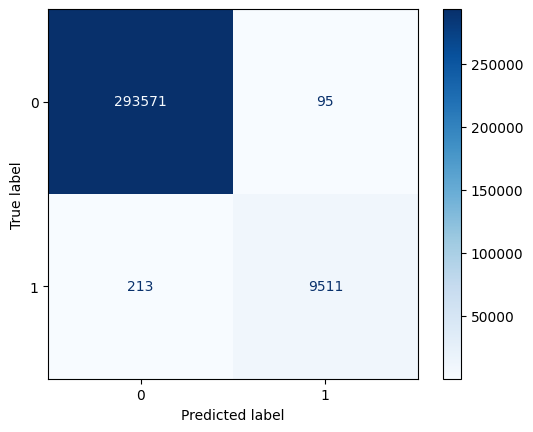

In [25]:
print(classification_report(y_test, y_pred_rf))
conf_matrix_forest = confusion_matrix(y_test, y_pred_rf)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=rf.classes_)
disp_forest.plot(cmap='Blues', values_format='d')
plt.show()

As you can see the FN and recall all yield impressive results however

### Classification Approach 2 to Failure Detection

Here we are using features and target(as described in the paper). However here the 24 hours prior to the machine failure is added as a failure targets

In [40]:

# Split data into training and test sets using stratified sampling
X = data_with_24hrs_target.drop('failure', axis=1)
y = data_with_24hrs_target['failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [41]:
y_train.value_counts(), y_test.value_counts()

(failure
 0    1097688
 1     115870
 Name: count, dtype: int64,
 failure
 0    274422
 1     28968
 Name: count, dtype: int64)

In [42]:
# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

RandomForest Model 

In [43]:

rf = RandomForestClassifier(n_estimators=100, random_state=42) #criterion="gini"
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)



              precision    recall  f1-score   support

           0       0.94      0.99      0.97    274422
           1       0.87      0.43      0.58     28968

    accuracy                           0.94    303390
   macro avg       0.91      0.71      0.77    303390
weighted avg       0.94      0.94      0.93    303390



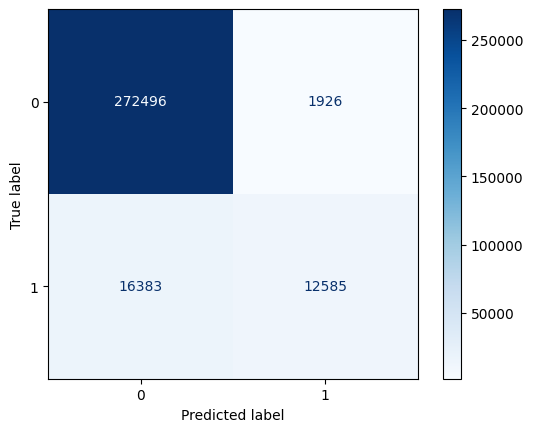

In [45]:
print(classification_report(y_test, y_pred_rf))
conf_matrix_forest = confusion_matrix(y_test, y_pred_rf)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=rf.classes_)
disp_forest.plot(cmap='Blues', values_format='d')
plt.show()

xgboost

In [46]:
# Fitting XGBoost to the training data
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)
y_pred = my_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    274422
           1       0.95      0.42      0.58     28968

    accuracy                           0.94    303390
   macro avg       0.95      0.71      0.77    303390
weighted avg       0.94      0.94      0.93    303390



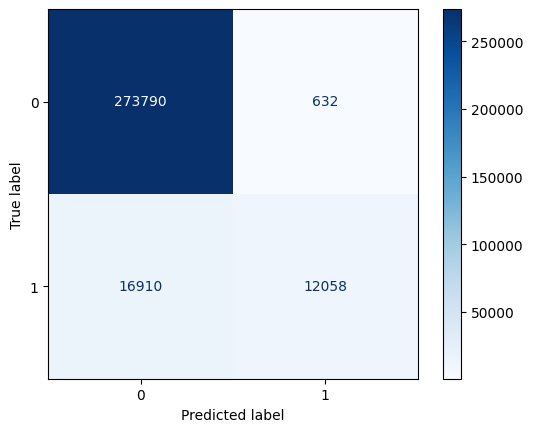

In [48]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

Decision Tree

In [32]:
dt = DecisionTreeClassifier(criterion="entropy") #log_loss
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95    274422
           1       0.49      0.51      0.49     28968

    accuracy                           0.90    303390
   macro avg       0.72      0.72      0.72    303390
weighted avg       0.90      0.90      0.90    303390



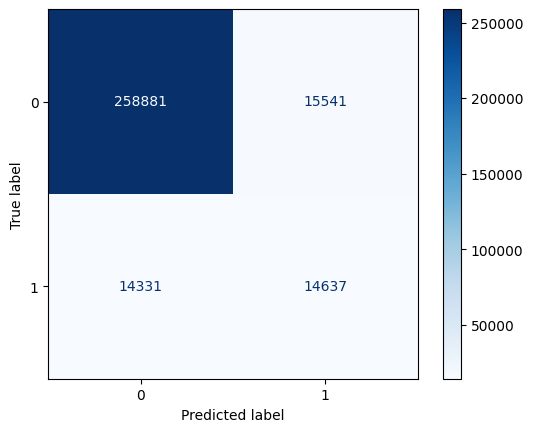

In [33]:
print(classification_report(y_test, y_pred_dt))
conf_matrix_forest = confusion_matrix(y_test, y_pred_dt)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=dt.classes_)
disp_forest.plot(cmap='Blues', values_format='d')

### Remaining useful life Approach

This approach predicts the remaining useful life by calculating the mean and standard deviation for each feature over the past 60 observations, creating a target variable based on the time difference to the next failure, and applying a linear regression model to the training data.

In [17]:
# feature_columns = [f'{feature}_mean' for feature in features] + [f'{feature}_std' for feature in features]
# X = data_rul[feature_columns]
# y_rul = data_rul['time_to_failure']

# Features and target
features = [col for col in data_rul.columns if col not in ['time_to_failure', 'time_to_failure_class']]
X = data_rul[features]
y = data_rul['time_to_failure_class']
y_rul = data_rul['time_to_failure']

X_train, X_test, y_train, y_test = train_test_split(X, y_rul, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 519583330.4824698
R^2 Score: 0.40752365382785827


In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


              precision    recall  f1-score   support

           0       0.99      0.71      0.83       120
           1       0.96      0.57      0.71       120
           2       0.99      0.59      0.74       240
           3       0.99      0.60      0.75       923
           4       1.00      1.00      1.00    235275

    accuracy                           1.00    236678
   macro avg       0.99      0.69      0.81    236678
weighted avg       1.00      1.00      1.00    236678



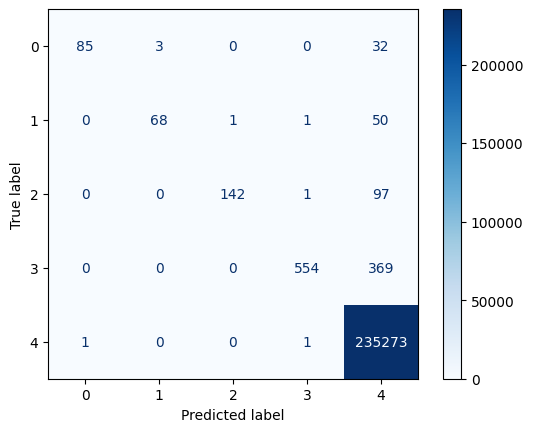

In [20]:
print(classification_report(y_test, y_pred))
conf_matrix_forest = confusion_matrix(y_test, y_pred)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=clf.classes_)
disp_forest.plot(cmap='Blues', values_format='d')
plt.show()

In [ ]:
data_with_24hrs_target

## Neural Network

Here we will be solely focused on reimplementing the proposed architecture form the paper. The paper proprosed using SAE network on the digital sensor data

In [124]:
# Using the first 2 months as training data, on of the training strategy proposed in the paper as

train = data_with_24hrs_target.loc["2020-02-01 00:00:00":"2020-04-11 11:49:59"]
test = data_with_24hrs_target.loc["2020-04-11 11:50:00":"2020-07-31 11:59:59"]


# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

digital_train = train.iloc[:, 7:15]
digital_test = test.iloc[:, 7:15]
tt = test.iloc[:, 7:16]


/var/folders/vx/fmr6xhj568xbt4t98wvdd5940000gv/T/ipykernel_10277/1926864673.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train.columns[0], axis=1, inplace=True)
/var/folders/vx/fmr6xhj568xbt4t98wvdd5940000gv/T/ipykernel_10277/1926864673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(test.columns[0], axis=1, inplace=True)


In [125]:
# Sparse AutoEncoder Network
input_layer = Input(shape=(1, digital_train.shape[1]))
layer_1 = Conv1D(filters=32, padding="same", kernel_size=3, activation='relu')(input_layer)
layer_2 = Conv1D(filters=16, padding="same", kernel_size=3, activation='relu')(layer_1)
bottleneck = Conv1D(filters=6, padding="same", kernel_size=3, activation="relu")(layer_2)

# Decoder Portion
layer_3 = Conv1DTranspose(filters=16, padding="same", kernel_size=3, activation='relu')(bottleneck)
layer_4 = Conv1DTranspose(filters=32, padding="same", kernel_size=3, activation='relu')(layer_3)
output_layer = Conv1DTranspose(filters=digital_train.shape[1], padding="same", kernel_size=3, activation="sigmoid")(layer_4)
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1, 8)]            0         
                                                                 
 conv1d_18 (Conv1D)          (None, 1, 32)             800       
                                                                 
 conv1d_19 (Conv1D)          (None, 1, 16)             1552      
                                                                 
 conv1d_20 (Conv1D)          (None, 1, 6)              294       
                                                                 
 conv1d_transpose_18 (Conv1D  (None, 1, 16)            304       
 Transpose)                                                      
                                                                 
 conv1d_transpose_19 (Conv1D  (None, 1, 32)            1568      
 Transpose)                                                

In [126]:

model.compile(optimizer='adam', loss='binary_crossentropy')
callback = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
hist = model.fit(np.expand_dims(digital_train, 1), np.expand_dims(digital_train, 1), validation_split=0.2,
                    epochs=50, callbacks=[callback], batch_size=60)


Epoch 1/50
6913/6913 [==============================] - 13s 2ms/step - loss: 0.0174 - val_loss: 0.0013
Epoch 2/50
6913/6913 [==============================] - 12s 2ms/step - loss: 0.0011 - val_loss: 7.5396e-04
Epoch 3/50
6913/6913 [==============================] - 22s 3ms/step - loss: 5.7490e-04 - val_loss: 4.4954e-04
Epoch 4/50
6913/6913 [==============================] - 19s 3ms/step - loss: 3.0333e-04 - val_loss: 3.0291e-04
Epoch 5/50
6913/6913 [==============================] - 18s 3ms/step - loss: 1.9560e-04 - val_loss: 1.6501e-04
Epoch 6/50
6913/6913 [==============================] - 13s 2ms/step - loss: 1.4474e-04 - val_loss: 1.8479e-04
Epoch 7/50
6913/6913 [==============================] - 12s 2ms/step - loss: 1.1385e-04 - val_loss: 1.1665e-04
Epoch 8/50
6913/6913 [==============================] - 11s 2ms/step - loss: 1.0474e-04 - val_loss: 1.0754e-04
Epoch 9/50
6913/6913 [==============================] - 10s 1ms/step - loss: 7.6656e-05 - val_loss: 8.7096e-05
Epoch 10/50
6

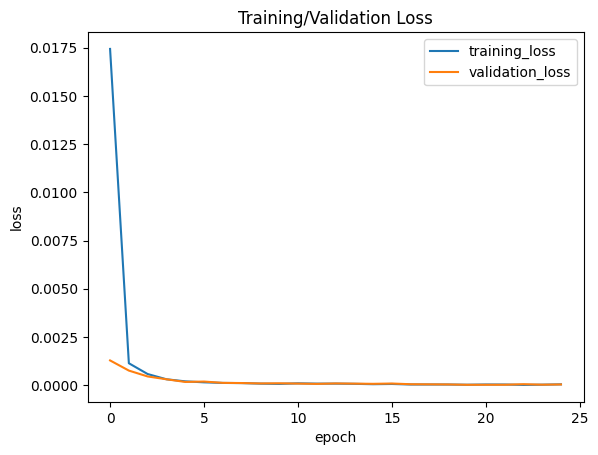

In [127]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Training/Validation Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["training_loss", "validation_loss"])
plt.show()

In [128]:
model.save('sae.keras')

In [129]:
train_pred = model.predict(np.expand_dims(digital_train, 1))
print("Shape of train_pred before reshaping:", train_pred.shape)

train_pred = np.reshape(train_pred, (len(train_pred), 8))
print("Shape of train_pred after reshaping:", train_pred.shape)


16201/16201 [==============================] - 15s 910us/step
Shape of train_pred before reshaping: (518429, 1, 8)
Shape of train_pred after reshaping: (518429, 8)


In [130]:
test_pred = model.predict(np.expand_dims(digital_test, 1))
print("Shape of test_pred before reshaping:", test_pred.shape)

test_pred = np.reshape(test_pred, (len(test_pred), 8))
print("Shape of test_pred after reshaping:", test_pred.shape)

24163/24163 [==============================] - 20s 810us/step
Shape of test_pred before reshaping: (773197, 1, 8)
Shape of test_pred after reshaping: (773197, 8)


error is passed through low_pass_filter to improve evaluation metrics

In [131]:
error = np.mean(np.square(test_pred - digital_test), axis=1)
alpha=0.05
error = error.reset_index(drop = True)
filtered_error = [error[0]]  # initialize the output with the first input value
for i in range(1, len(error)):
    filtered_error.append(filtered_error[i - 1] + alpha * (error[i] - filtered_error[i - 1]))
predictions = [1 if error > 0.1 else 0 for error in filtered_error]
test["predicted_output"] = predictions

/var/folders/vx/fmr6xhj568xbt4t98wvdd5940000gv/T/ipykernel_10277/582412316.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_output"] = predictions


/Users/oadeyo/anaconda3/envs/bridgelab/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/oadeyo/anaconda3/envs/bridgelab/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.81      1.00      0.90    628359
           1       0.00      0.00      0.00    144838

    accuracy                           0.81    773197
   macro avg       0.41      0.50      0.45    773197
weighted avg       0.66      0.81      0.73    773197



/Users/oadeyo/anaconda3/envs/bridgelab/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/folders/vx/fmr6xhj568xbt4t98wvdd5940000gv/T/ipykernel_10277/2744334625.py:7: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


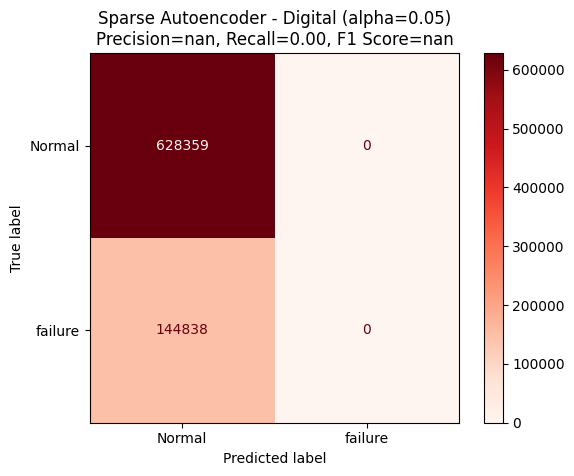

In [132]:
cm = confusion_matrix(test["failure"], test["predicted_output"])
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
print(classification_report(test["failure"], test["predicted_output"]))
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "failure"])
disp.plot(values_format='d', cmap="Reds")
plt.title("Sparse Autoencoder - Digital (alpha=0.05)\nPrecision={:.2f}, Recall={:.2f}, F1 Score={:.2f}".format(precision, recall, f1_score))
plt.show()

In [149]:
preprocessor = DataPreprocessor("dataset_train_processed.csv") # change according to where your data is stored
    
    preprocessor.preprocessing_autoencoder()
    autoencoder = AutoencoderModels(preprocessor.digital_train, preprocessor.digital_test) # comment out depending on whether digital/analog data is used
    # autoencoder = AutoencoderModels(preprocessor.analog_train, preprocessor.analog_test)
    # autoencoder.sae_analog() # comment out according to which method you call from the AutoencoderModels class
    autoencoder.sae_digital()
    # autoencoder.vae_analog()
    # autoencoder.vae_digital()
    train_pred, test_pred = autoencoder.autoencoder_predict_digital()
    with open("sae_digital_train_pred", "wb") as file: # name of file path can change depending on where you want to save it
        pickle.dump(train_pred, file)
    with open("sae_digital_test_pred", "wb") as file: # similarly, this file path can be changed
        pickle.dump(test_pred, file)
    print(autoencoder.model.summary())
    autoencoder.plot_losses()